In [6]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc10/BHOSS_CODE"
data = "Rhigh_1_incl_10_IMAGE_GRMHD_HAMR3D_SANEA93M_135.dat"
#datadir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc50/BHOSS_CODE"
#data = "Rhigh_10_incl_50_IMAGE_GRMHD_HAMR3D_MADA05_112.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 1
time: 9955.791871 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: -0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): True
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 0.0 0.000673995
Total flux = 1.983788 Jy at 230 GHz


In [18]:
print(bhdata.inclination, bhdata.phi, bhdata.spin)

70.0 0.0 0.5


In [101]:
print(bhdata.totFlux)

1.3661460107794135e-10


width: 16.107000 Rg, offset: 0.000000 Rg, resolution: 320, Number of obs. freqs: 1
time: 9008.689295 Rg/c, inclination: 50.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.761953e+22, Jansky correction: 6.025783e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: 230.0
307200
-81.01246801847637 81.01246801847637 -81.01246801847637 81.01246801847637
(zmin,zmax)= 2.44258e-13 0.000462947
Total flux = 1.998977 Jy at 1 GHz
0:00:23.190 - Start Program


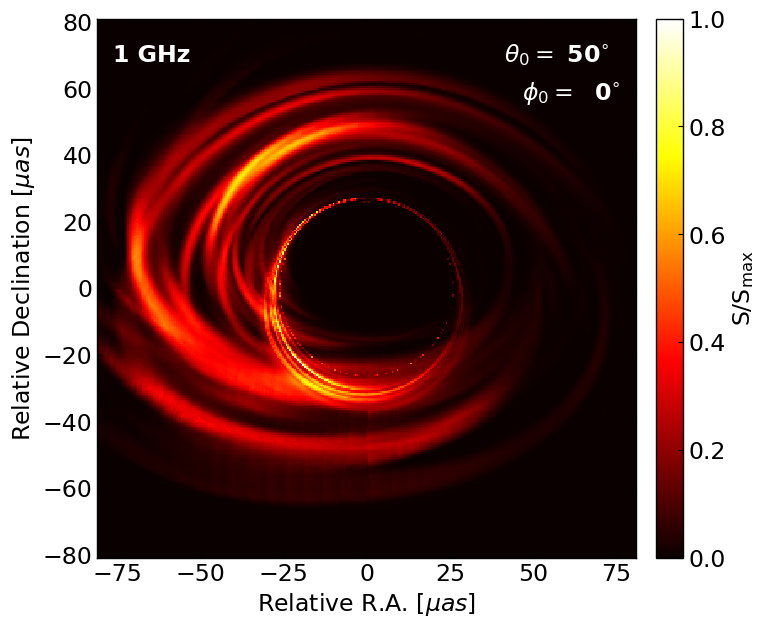

In [9]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'
datadir = "/ccs/home/astrodoo/MEMW/bhoss_code"
data = "Rhigh_1_incl_50_IMAGE_GRMHD_HAMR3D_SANEA0_640.dat"


filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=3,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [19]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,inclination,model_name):

    if (model_name is"MADA05"):
        model_str = "bhoss_MA05"
        ind_start = 100
        ind_end = 299
    elif (model_name is "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name is "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    #if(model_name=='SANEA0'):
    #    os.chdir("/gpfs/alpine/phy129/scratch/astrodoo/bhoss_code/BHOSS_CODE")
    #    ind_start=640
    #    ind_end  =642
    #elif(model_name=='SANEA05'):
    #    os.chdir("/gpfs/alpine/phy129/scratch/kchatterj/EHT_images/SA05/SA05_Rh%d/BHOSS_CODE"%(Rhigh))
    #    ind_start=789
    #    ind_end  =889
    #elif(model_name=='MADA05'):
    #    os.chdir("/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc50/BHOSS_CODE")
    #    ind_start=100
    #    ind_end  =299
    #else:
    #    print("no model")
    #    return  
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rhigh_%d_incl_%d_IMAGE_GRMHD_HAMR3D_%s_%d.dat"%(Rhigh,inclination,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 3))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [32]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")

ind,time,z_tot,dscale = bhoss_avg(1, 10, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc10/BHOSS_CODE
132, flux: 1.898587 at 9925.528924
133, flux: 1.918983 at 9934.173457
134, flux: 1.951984 at 9942.822006
135, flux: 1.983788 at 9955.791871
136, flux: 2.004266 at 9964.438576
137, flux: 2.002275 at 9973.082137
138, flux: 2.002108 at 9986.049828
139, flux: 2.001847 at 9994.698523
140, flux: 2.010469 at 10003.343218
141, flux: 2.043108 at 10016.310270
142, flux: 2.054041 at 10024.962133
143, flux: 2.055658 at 10033.615429
144, flux: 2.082504 at 10046.591838
145, flux: 2.094774 at 10055.242073
146, flux: 2.098134 at 10063.900253
147, flux: 2.107361 at 10076.889057
148, flux: 2.116135 at 10085.542268
149, flux: 2.132765 at 10094.188939
150, flux: 2.164529 at 10102.838018
151, flux: 2.190529 at 10115.820650
152, flux: 2.196506 at 10124.473785
153, flux: 2.201432 at 10133.126518
154, flux: 2.205354 at 10146.100336
155, flux: 2.192901 at 10154.746542
156, flux: 2.168858 at 10163.398930
157, flux: 2.

In [33]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [34]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 1.975662 Jy, the density scale = 6.350000e-15


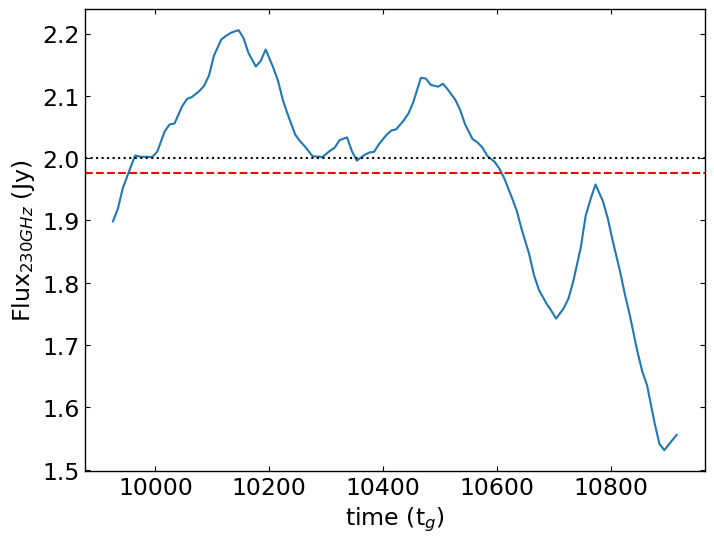

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [36]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

132:: 1.898587 Jy at 9925.528924
133:: 1.918983 Jy at 9934.173457
134:: 1.951984 Jy at 9942.822006
135:: 1.983788 Jy at 9955.791871
136:: 2.004266 Jy at 9964.438576
137:: 2.002275 Jy at 9973.082137
138:: 2.002108 Jy at 9986.049828
139:: 2.001847 Jy at 9994.698523
140:: 2.010469 Jy at 10003.343218
141:: 2.043108 Jy at 10016.310270
142:: 2.054041 Jy at 10024.962133
143:: 2.055658 Jy at 10033.615429
144:: 2.082504 Jy at 10046.591838
145:: 2.094774 Jy at 10055.242073
146:: 2.098134 Jy at 10063.900253
147:: 2.107361 Jy at 10076.889057
148:: 2.116135 Jy at 10085.542268
149:: 2.132765 Jy at 10094.188939
150:: 2.164529 Jy at 10102.838018
151:: 2.190529 Jy at 10115.820650
152:: 2.196506 Jy at 10124.473785
153:: 2.201432 Jy at 10133.126518
154:: 2.205354 Jy at 10146.100336
155:: 2.192901 Jy at 10154.746542
156:: 2.168858 Jy at 10163.398930
157:: 2.146996 Jy at 10176.385271
158:: 2.156307 Jy at 10185.047716
159:: 2.174331 Jy at 10193.708846
160:: 2.145907 Jy at 10206.700720
161:: 2.124055 Jy at 1

In [27]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")

ind,time,z_tot,dscale = bhoss_avg(1, 30, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc30/BHOSS_CODE
132, flux: 1.659501 at 9925.528924
133, flux: 1.677046 at 9934.173457
134, flux: 1.707945 at 9942.822006
135, flux: 1.761022 at 9955.791871
136, flux: 1.796884 at 9964.438576
137, flux: 1.815797 at 9973.082137
138, flux: 1.850420 at 9986.049828
139, flux: 1.890517 at 9994.698523
140, flux: 1.933676 at 10003.343218
141, flux: 2.023885 at 10016.310270
142, flux: 2.074821 at 10024.962133
143, flux: 2.114740 at 10033.615429
144, flux: 2.189010 at 10046.591838
145, flux: 2.226532 at 10055.242073
146, flux: 2.245376 at 10063.900253
147, flux: 2.273143 at 10076.889057
148, flux: 2.295972 at 10085.542268
149, flux: 2.326153 at 10094.188939
150, flux: 2.364801 at 10102.838018
151, flux: 2.392820 at 10115.820650
152, flux: 2.397462 at 10124.473785
153, flux: 2.404072 at 10133.126518
154, flux: 2.408685 at 10146.100336
155, flux: 2.393365 at 10154.746542
156, flux: 2.362494 at 10163.398930
157, flux: 2.

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 1.980990 Jy, the density scale = 6.300000e-15


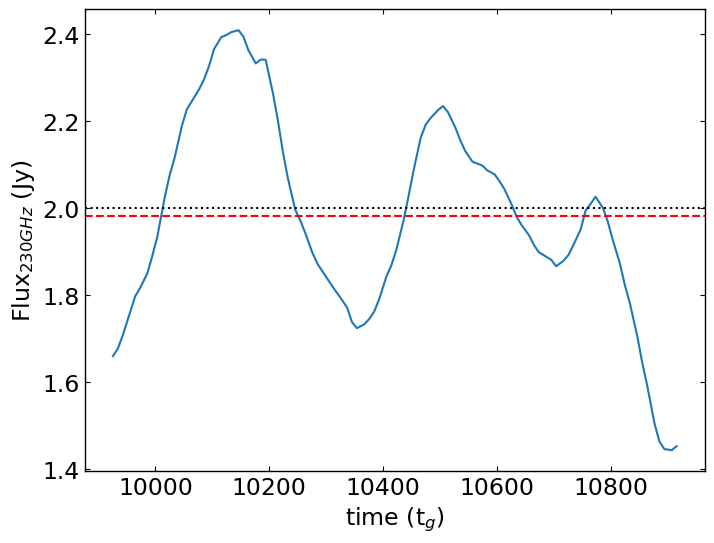

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

132:: 1.659501 Jy at 9925.528924
133:: 1.677046 Jy at 9934.173457
134:: 1.707945 Jy at 9942.822006
135:: 1.761022 Jy at 9955.791871
136:: 1.796884 Jy at 9964.438576
137:: 1.815797 Jy at 9973.082137
138:: 1.850420 Jy at 9986.049828
139:: 1.890517 Jy at 9994.698523
140:: 1.933676 Jy at 10003.343218
141:: 2.023885 Jy at 10016.310270
142:: 2.074821 Jy at 10024.962133
143:: 2.114740 Jy at 10033.615429
144:: 2.189010 Jy at 10046.591838
145:: 2.226532 Jy at 10055.242073
146:: 2.245376 Jy at 10063.900253
147:: 2.273143 Jy at 10076.889057
148:: 2.295972 Jy at 10085.542268
149:: 2.326153 Jy at 10094.188939
150:: 2.364801 Jy at 10102.838018
151:: 2.392820 Jy at 10115.820650
152:: 2.397462 Jy at 10124.473785
153:: 2.404072 Jy at 10133.126518
154:: 2.408685 Jy at 10146.100336
155:: 2.393365 Jy at 10154.746542
156:: 2.362494 Jy at 10163.398930
157:: 2.332210 Jy at 10176.385271
158:: 2.341181 Jy at 10185.047716
159:: 2.340641 Jy at 10193.708846
160:: 2.261975 Jy at 10206.700720
161:: 2.199016 Jy at 1

In [7]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
ind,time,z_tot,dscale = bhoss_avg(10, 50, "MADA05")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc50/BHOSS_CODE
100, flux: 1.846210 at 9155.429527
101, flux: 1.883624 at 9160.708492
102, flux: 1.884275 at 9171.268297
103, flux: 1.830251 at 9181.830328
104, flux: 1.765257 at 9192.396246
105, flux: 1.706827 at 9202.960320
106, flux: 1.726677 at 9213.523741
107, flux: 1.742686 at 9224.087047
108, flux: 1.756298 at 9234.649068
109, flux: 1.814885 at 9245.208456
110, flux: 1.853082 at 9250.488437
111, flux: 1.945023 at 9261.047372
112, flux: 1.990218 at 9271.611168
113, flux: 2.032969 at 9282.176408
114, flux: 2.090985 at 9292.737111
115, flux: 2.148374 at 9303.297993
116, flux: 2.240249 at 9313.858757
117, flux: 2.396244 at 9324.417722
118, flux: 2.564333 at 9334.980693
119, flux: 2.741140 at 9345.543632
120, flux: 2.825003 at 9350.825561
121, flux: 3.012993 at 9361.390404
122, flux: 3.184455 at 9371.951983
123, flux: 3.268137 at 9382.514850
124, flux: 3.297781 at 9393.076994
125, flux: 3.328657 at 9403.63

In [8]:
print(ind)

[100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113.
 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127.
 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141.
 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155.
 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169.
 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183.
 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197.
 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210. 211.
 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223. 224. 225.
 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237. 238. 239.
 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250. 251. 252. 253.
 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267.
 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279. 280. 281.
 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292. 293. 294. 295.
 296. 

In [9]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [139]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 100/299/200
average z_tot = 1.985464 Jy, the density scale = 2.560000e-19


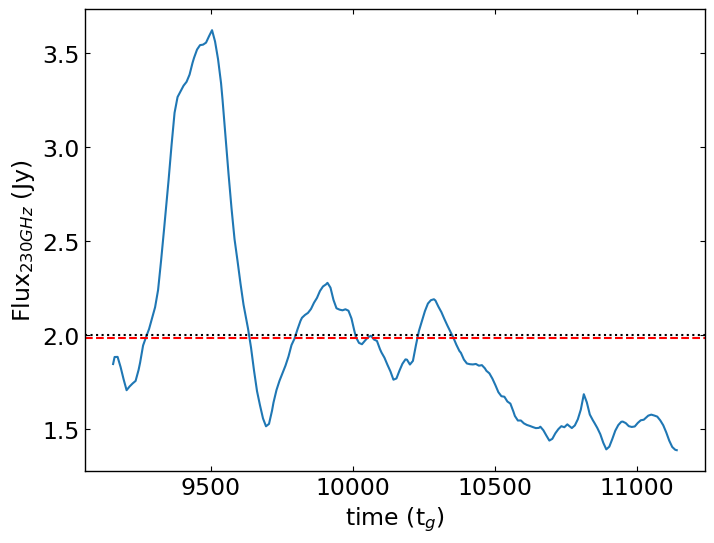

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [11]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

100:: 1.846210 Jy at 9155.429527
101:: 1.883624 Jy at 9160.708492
102:: 1.884275 Jy at 9171.268297
103:: 1.830251 Jy at 9181.830328
104:: 1.765257 Jy at 9192.396246
105:: 1.706827 Jy at 9202.960320
106:: 1.726677 Jy at 9213.523741
107:: 1.742686 Jy at 9224.087047
108:: 1.756298 Jy at 9234.649068
109:: 1.814885 Jy at 9245.208456
110:: 1.853082 Jy at 9250.488437
111:: 1.945023 Jy at 9261.047372
112:: 1.990218 Jy at 9271.611168
113:: 2.032969 Jy at 9282.176408
114:: 2.090985 Jy at 9292.737111
115:: 2.148374 Jy at 9303.297993
116:: 2.240249 Jy at 9313.858757
117:: 2.396244 Jy at 9324.417722
118:: 2.564333 Jy at 9334.980693
119:: 2.741140 Jy at 9345.543632
120:: 2.825003 Jy at 9350.825561
121:: 3.012993 Jy at 9361.390404
122:: 3.184455 Jy at 9371.951983
123:: 3.268137 Jy at 9382.514850
124:: 3.297781 Jy at 9393.076994
125:: 3.328657 Jy at 9403.637440
126:: 3.348990 Jy at 9414.201757
127:: 3.387396 Jy at 9424.763152
128:: 3.450599 Jy at 9435.321062
129:: 3.476904 Jy at 9440.601225
130:: 3.52

In [ ]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
ind,time,z_tot,dscale = bhoss_avg(10, 70, "MADA05")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc70/BHOSS_CODE
100, flux: 1.993284 at 9155.429527
101, flux: 2.027464 at 9160.708492
102, flux: 2.021537 at 9171.268297
103, flux: 1.955827 at 9181.830328
104, flux: 1.870675 at 9192.396246
105, flux: 1.777799 at 9202.960320
106, flux: 1.772364 at 9213.523741
107, flux: 1.776146 at 9224.087047
108, flux: 1.801953 at 9234.649068
109, flux: 1.884090 at 9245.208456
110, flux: 1.943390 at 9250.488437
111, flux: 2.057904 at 9261.047372
112, flux: 2.076877 at 9271.611168
113, flux: 2.075190 at 9282.176408
114, flux: 2.115600 at 9292.737111
115, flux: 2.179108 at 9303.297993
116, flux: 2.277931 at 9313.858757
117, flux: 2.410190 at 9324.417722
118, flux: 2.586481 at 9334.980693
119, flux: 2.778527 at 9345.543632
120, flux: 2.863737 at 9350.825561
121, flux: 3.069625 at 9361.390404
122, flux: 3.307918 at 9371.951983
123, flux: 3.390983 at 9382.514850
124, flux: 3.385645 at 9393.076994
125, flux: 3.432245 at 9403.63

In [ ]:
print(ind)

[100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113.
 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127.
 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141.
 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155.
 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169.
 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183.
 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197.
 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210. 211.
 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223. 224. 225.
 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237. 238. 239.
 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250. 251. 252. 253.
 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267.
 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279. 280. 281.
 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292. 293. 294. 295.
 296. 

In [ ]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [36]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 100/299/200
average z_tot = 2.060680 Jy, the density scale = 2.410000e-19


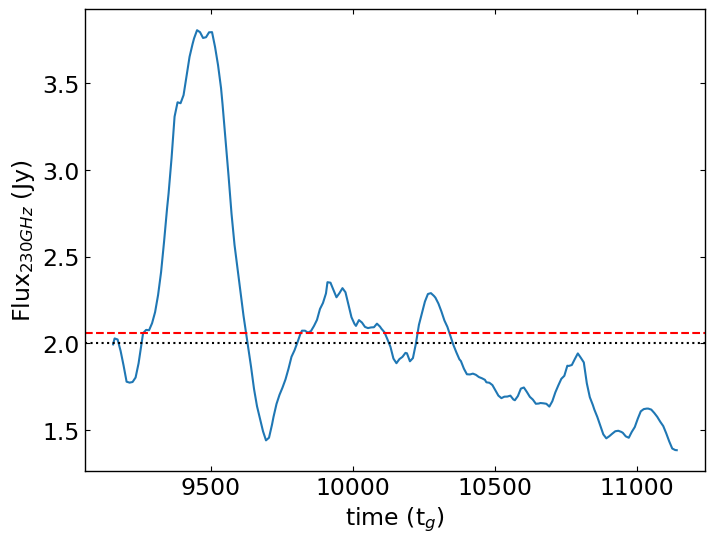

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

# SANE A93 M

In [16]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")

ind,time,z_tot,dscale = bhoss_avg(1, 50, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc50/BHOSS_CODE
132, flux: 1.663185 at 9925.528924
133, flux: 1.685607 at 9934.173457
134, flux: 1.727857 at 9942.822006
135, flux: 1.789350 at 9955.791871
136, flux: 1.830741 at 9964.438576
137, flux: 1.857585 at 9973.082137
138, flux: 1.912124 at 9986.049828
139, flux: 1.967587 at 9994.698523
140, flux: 2.025222 at 10003.343218
141, flux: 2.130178 at 10016.310270
142, flux: 2.185934 at 10024.962133
143, flux: 2.224254 at 10033.615429
144, flux: 2.295677 at 10046.591838
145, flux: 2.335419 at 10055.242073
146, flux: 2.363328 at 10063.900253
147, flux: 2.391347 at 10076.889057
148, flux: 2.402221 at 10085.542268
149, flux: 2.419578 at 10094.188939
150, flux: 2.442576 at 10102.838018
151, flux: 2.450803 at 10115.820650
152, flux: 2.439591 at 10124.473785
153, flux: 2.429012 at 10133.126518
154, flux: 2.411356 at 10146.100336
155, flux: 2.385425 at 10154.746542
156, flux: 2.347549 at 10163.398930
157, flux: 2.

In [17]:
print(ind)

[132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229.
 230. 231.]


In [18]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [19]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 1.995281 Jy, the density scale = 6.510000e-15


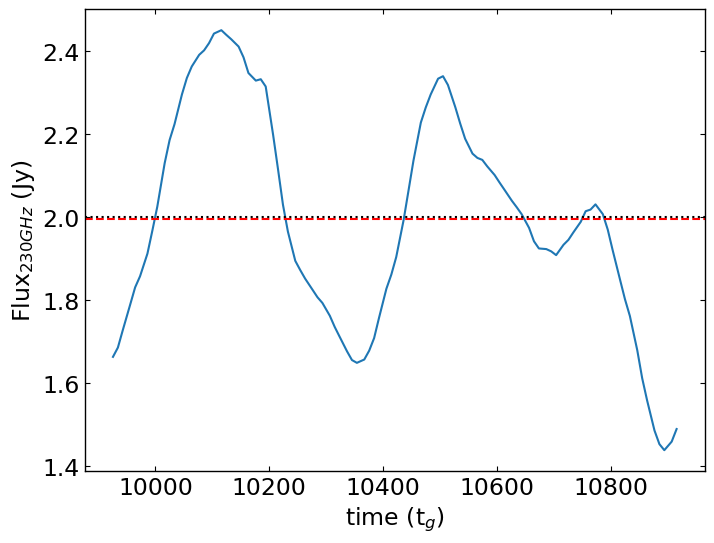

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [24]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")

ind,time,z_tot,dscale = bhoss_avg(1, 70, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc70/BHOSS_CODE
132, flux: 1.836953 at 9925.528924
133, flux: 1.875131 at 9934.173457
134, flux: 1.921620 at 9942.822006
135, flux: 1.968047 at 9955.791871
136, flux: 1.986098 at 9964.438576
137, flux: 1.994203 at 9973.082137
138, flux: 2.033461 at 9986.049828
139, flux: 2.083286 at 9994.698523
140, flux: 2.140598 at 10003.343218
141, flux: 2.229853 at 10016.310270
142, flux: 2.275144 at 10024.962133
143, flux: 2.297210 at 10033.615429
144, flux: 2.347294 at 10046.591838
145, flux: 2.374712 at 10055.242073
146, flux: 2.394194 at 10063.900253
147, flux: 2.404632 at 10076.889057
148, flux: 2.391573 at 10085.542268
149, flux: 2.372542 at 10094.188939
150, flux: 2.346168 at 10102.838018
151, flux: 2.302687 at 10115.820650
152, flux: 2.276270 at 10124.473785
153, flux: 2.258137 at 10133.126518
154, flux: 2.226665 at 10146.100336
155, flux: 2.204855 at 10154.746542
156, flux: 2.179680 at 10163.398930
157, flux: 2.

In [25]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [26]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.005993 Jy, the density scale = 7.100000e-15


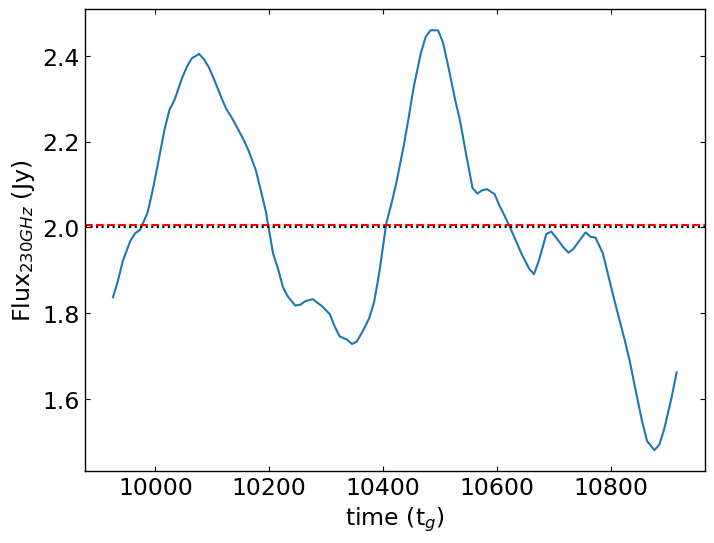

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [ ]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")

ind,time,z_tot,dscale = bhoss_avg(1, 90, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc90/BHOSS_CODE
132, flux: 2.030956 at 9925.528924
133, flux: 2.072344 at 9934.173457
134, flux: 2.101759 at 9942.822006
135, flux: 2.104877 at 9955.791871
136, flux: 2.092063 at 9964.438576
137, flux: 2.077537 at 9973.082137
138, flux: 2.157042 at 9986.049828
139, flux: 2.225232 at 9994.698523
140, flux: 2.332261 at 10003.343218
141, flux: 2.478625 at 10016.310270
142, flux: 2.534014 at 10024.962133
143, flux: 2.521975 at 10033.615429
144, flux: 2.475343 at 10046.591838
145, flux: 2.455091 at 10055.242073
146, flux: 2.392064 at 10063.900253
147, flux: 2.319445 at 10076.889057
148, flux: 2.260622 at 10085.542268
149, flux: 2.187559 at 10094.188939
150, flux: 2.133299 at 10102.838018
151, flux: 2.101984 at 10115.820650
152, flux: 2.092265 at 10124.473785
153, flux: 2.057614 at 10133.126518
154, flux: 2.027480 at 10146.100336
155, flux: 2.026544 at 10154.746542
156, flux: 2.036491 at 10163.398930
157, flux: 1.

In [ ]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [ ]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 1.977607 Jy, the density scale = 7.260000e-15


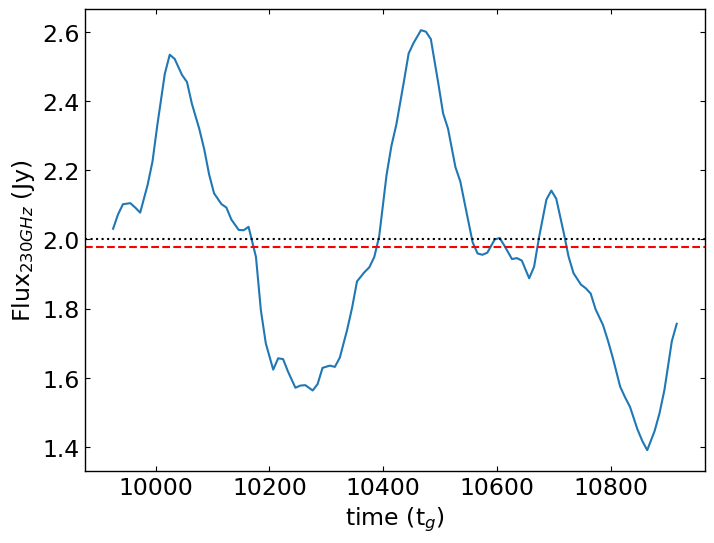

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [3]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")

ind,time,z_tot,dscale = bhoss_avg(5, 50, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc50/BHOSS_CODE
132, flux: 1.891256 at 9925.528924
133, flux: 1.889020 at 9934.173457
134, flux: 1.905595 at 9942.822006
135, flux: 1.880178 at 9955.791871
136, flux: 1.875184 at 9964.438576
137, flux: 1.873943 at 9973.082137
138, flux: 1.914339 at 9986.049828
139, flux: 1.952877 at 9994.698523
140, flux: 1.968928 at 10003.343218
141, flux: 1.989910 at 10016.310270
142, flux: 2.014519 at 10024.962133
143, flux: 2.004572 at 10033.615429
144, flux: 1.993752 at 10046.591838
145, flux: 1.997920 at 10055.242073
146, flux: 1.992184 at 10063.900253
147, flux: 1.984110 at 10076.889057
148, flux: 2.002860 at 10085.542268
149, flux: 2.045429 at 10094.188939
150, flux: 2.090890 at 10102.838018
151, flux: 2.189158 at 10115.820650
152, flux: 2.271062 at 10124.473785
153, flux: 2.345374 at 10133.126518
154, flux: 2.384921 at 10146.100336
155, flux: 2.379834 at 10154.746542
156, flux: 2.352832 at 10163.398930
157, flux: 2.

In [4]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [5]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.066962 Jy, the density scale = 2.750000e-14


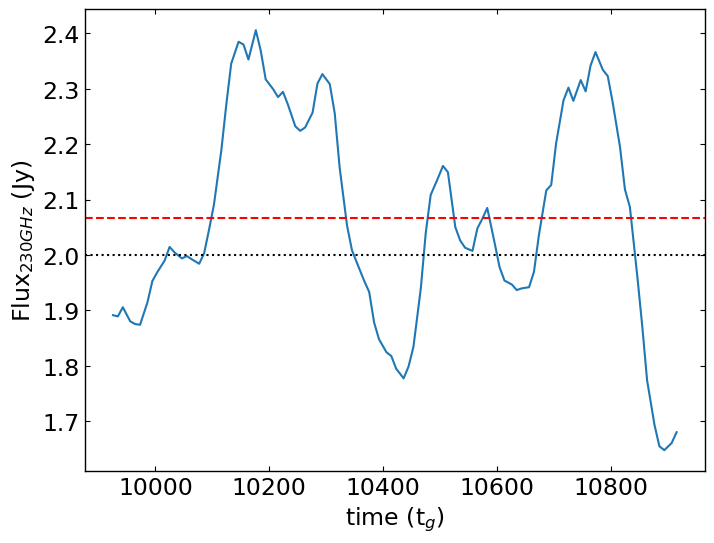

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [7]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")

ind,time,z_tot,dscale = bhoss_avg(5, 70, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc70/BHOSS_CODE
132, flux: 1.860256 at 9925.528924
133, flux: 1.867501 at 9934.173457
134, flux: 1.865905 at 9942.822006
135, flux: 1.825563 at 9955.791871
136, flux: 1.808370 at 9964.438576
137, flux: 1.819634 at 9973.082137
138, flux: 1.871404 at 9986.049828
139, flux: 1.904527 at 9994.698523
140, flux: 1.952958 at 10003.343218
141, flux: 1.984235 at 10016.310270
142, flux: 2.011267 at 10024.962133
143, flux: 2.022032 at 10033.615429
144, flux: 2.027443 at 10046.591838
145, flux: 2.024636 at 10055.242073
146, flux: 2.002152 at 10063.900253
147, flux: 2.029401 at 10076.889057
148, flux: 2.058540 at 10085.542268
149, flux: 2.091995 at 10094.188939
150, flux: 2.129810 at 10102.838018
151, flux: 2.216923 at 10115.820650
152, flux: 2.275944 at 10124.473785
153, flux: 2.334421 at 10133.126518
154, flux: 2.356163 at 10146.100336
155, flux: 2.326250 at 10154.746542
156, flux: 2.280024 at 10163.398930
157, flux: 2.

In [8]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [9]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.041175 Jy, the density scale = 2.850000e-14


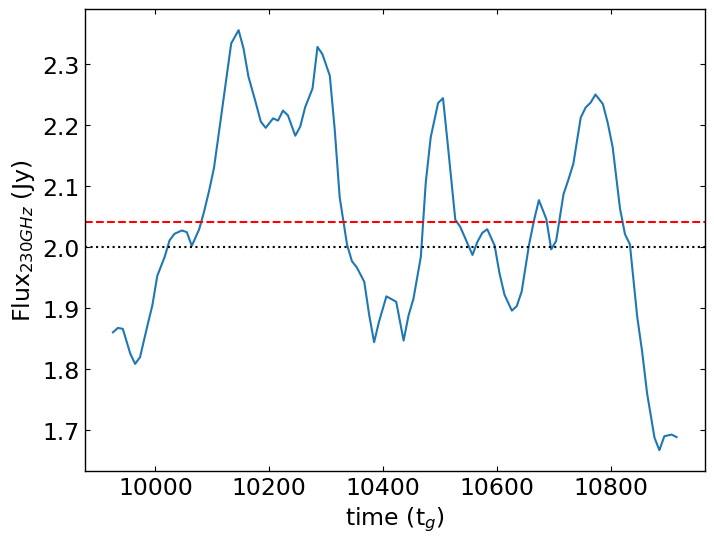

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [11]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")

ind,time,z_tot,dscale = bhoss_avg(5, 90, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc90/BHOSS_CODE
132, flux: 1.874901 at 9925.528924
133, flux: 1.892798 at 9934.173457
134, flux: 1.872554 at 9942.822006
135, flux: 1.813683 at 9955.791871
136, flux: 1.811876 at 9964.438576
137, flux: 1.831265 at 9973.082137
138, flux: 1.884768 at 9986.049828
139, flux: 1.923005 at 9994.698523
140, flux: 1.976039 at 10003.343218
141, flux: 2.062245 at 10016.310270
142, flux: 2.060597 at 10024.962133
143, flux: 2.055094 at 10033.615429
144, flux: 2.088676 at 10046.591838
145, flux: 2.072067 at 10055.242073
146, flux: 2.014606 at 10063.900253
147, flux: 2.038303 at 10076.889057
148, flux: 2.075452 at 10085.542268
149, flux: 2.107936 at 10094.188939
150, flux: 2.129389 at 10102.838018
151, flux: 2.152506 at 10115.820650
152, flux: 2.155746 at 10124.473785
153, flux: 2.160354 at 10133.126518
154, flux: 2.213218 at 10146.100336
155, flux: 2.268597 at 10154.746542
156, flux: 2.299644 at 10163.398930
157, flux: 2.

In [12]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [13]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 1.974744 Jy, the density scale = 3.000000e-14


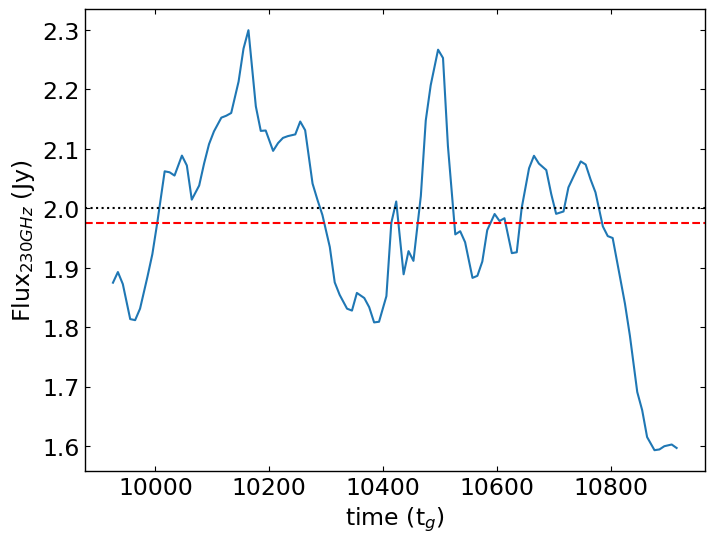

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [15]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")

ind,time,z_tot,dscale = bhoss_avg(10, 50, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc50/BHOSS_CODE
132, flux: 1.903425 at 9925.528924
133, flux: 1.875215 at 9934.173457
134, flux: 1.873857 at 9942.822006
135, flux: 1.839758 at 9955.791871
136, flux: 1.828808 at 9964.438576
137, flux: 1.846457 at 9973.082137
138, flux: 1.919261 at 9986.049828
139, flux: 1.994679 at 9994.698523
140, flux: 2.024013 at 10003.343218
141, flux: 2.059100 at 10016.310270
142, flux: 2.082143 at 10024.962133
143, flux: 2.049547 at 10033.615429
144, flux: 1.995663 at 10046.591838
145, flux: 1.980131 at 10055.242073
146, flux: 1.970020 at 10063.900253
147, flux: 1.973723 at 10076.889057
148, flux: 2.005493 at 10085.542268
149, flux: 2.051741 at 10094.188939
150, flux: 2.107692 at 10102.838018
151, flux: 2.203687 at 10115.820650
152, flux: 2.281182 at 10124.473785
153, flux: 2.359170 at 10133.126518
154, flux: 2.404313 at 10146.100336
155, flux: 2.392280 at 10154.746542
156, flux: 2.348661 at 10163.398930
157, flux: 2

In [16]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [17]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.041093 Jy, the density scale = 3.950000e-14


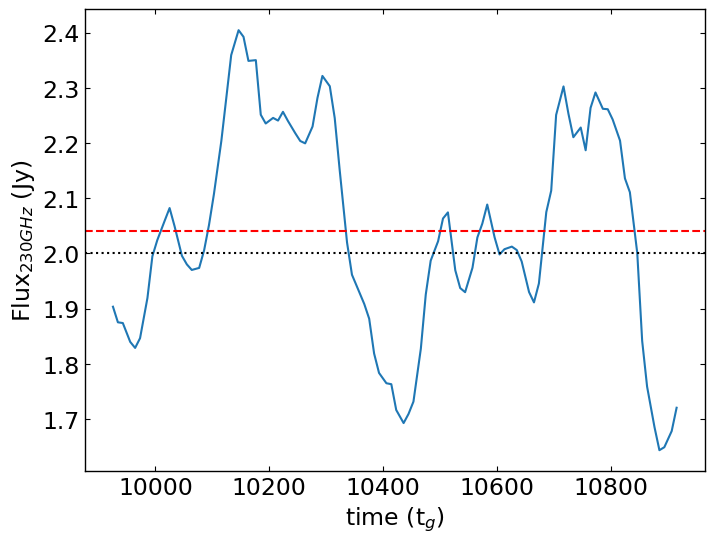

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [19]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")

ind,time,z_tot,dscale = bhoss_avg(10, 70, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc70/BHOSS_CODE
132, flux: 1.904884 at 9925.528924
133, flux: 1.894353 at 9934.173457
134, flux: 1.868293 at 9942.822006
135, flux: 1.827987 at 9955.791871
136, flux: 1.816203 at 9964.438576
137, flux: 1.856443 at 9973.082137
138, flux: 1.932759 at 9986.049828
139, flux: 1.990536 at 9994.698523
140, flux: 2.037257 at 10003.343218
141, flux: 2.057200 at 10016.310270
142, flux: 2.075254 at 10024.962133
143, flux: 2.062819 at 10033.615429
144, flux: 2.023906 at 10046.591838
145, flux: 2.000594 at 10055.242073
146, flux: 1.965050 at 10063.900253
147, flux: 1.999720 at 10076.889057
148, flux: 2.038692 at 10085.542268
149, flux: 2.085112 at 10094.188939
150, flux: 2.139594 at 10102.838018
151, flux: 2.245222 at 10115.820650
152, flux: 2.307315 at 10124.473785
153, flux: 2.372195 at 10133.126518
154, flux: 2.399407 at 10146.100336
155, flux: 2.349650 at 10154.746542
156, flux: 2.293372 at 10163.398930
157, flux: 2

In [20]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [21]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.033090 Jy, the density scale = 4.050000e-14


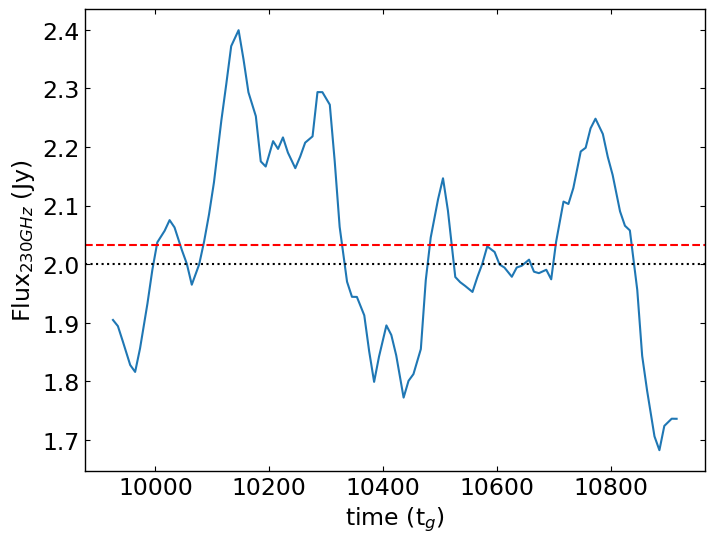

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [23]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")

ind,time,z_tot,dscale = bhoss_avg(10, 90, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc90/BHOSS_CODE
132, flux: 1.972041 at 9925.528924
133, flux: 1.942532 at 9934.173457
134, flux: 1.891603 at 9942.822006
135, flux: 1.841914 at 9955.791871
136, flux: 1.863569 at 9964.438576
137, flux: 1.914175 at 9973.082137
138, flux: 1.989127 at 9986.049828
139, flux: 2.026839 at 9994.698523
140, flux: 2.077351 at 10003.343218
141, flux: 2.159145 at 10016.310270
142, flux: 2.148753 at 10024.962133
143, flux: 2.118041 at 10033.615429
144, flux: 2.114036 at 10046.591838
145, flux: 2.071285 at 10055.242073
146, flux: 2.024242 at 10063.900253
147, flux: 2.050164 at 10076.889057
148, flux: 2.097301 at 10085.542268
149, flux: 2.144358 at 10094.188939
150, flux: 2.195729 at 10102.838018
151, flux: 2.242371 at 10115.820650
152, flux: 2.252310 at 10124.473785
153, flux: 2.264901 at 10133.126518
154, flux: 2.312120 at 10146.100336
155, flux: 2.366196 at 10154.746542
156, flux: 2.400842 at 10163.398930
157, flux: 2

In [24]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [25]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.015855 Jy, the density scale = 4.360000e-14


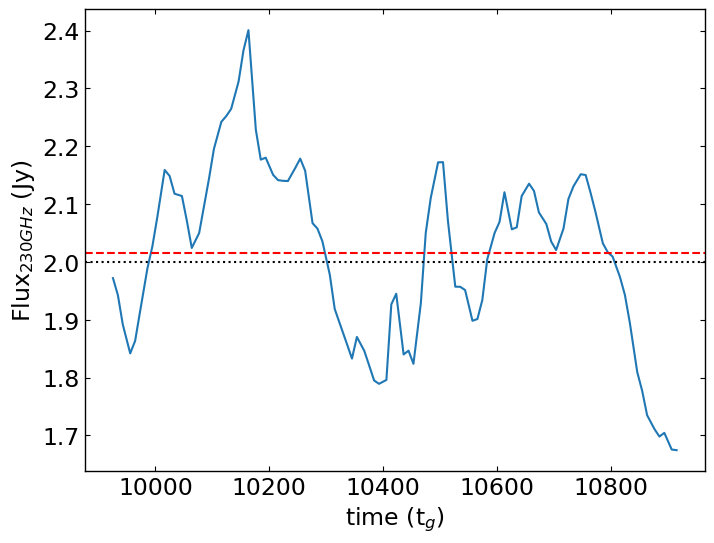

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

# MAD A05

In [27]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc50/BHOSS_CODE
100, flux: 1.966509 at 9155.429527
101, flux: 1.988102 at 9160.708492
102, flux: 2.021380 at 9171.268297
103, flux: 2.061641 at 9181.830328
104, flux: 2.115434 at 9192.396246
105, flux: 2.193407 at 9202.960320
106, flux: 2.306195 at 9213.523741
107, flux: 2.364748 at 9224.087047
108, flux: 2.385617 at 9234.649068
109, flux: 2.404949 at 9245.208456
110, flux: 2.418052 at 9250.488437
111, flux: 2.456403 at 9261.047372
112, flux: 2.496817 at 9271.611168
113, flux: 2.521783 at 9282.176408
114, flux: 2.547963 at 9292.737111
115, flux: 2.574214 at 9303.297993
116, flux: 2.602996 at 9313.858757
117, flux: 2.617369 at 9324.417722
118, flux: 2.600259 at 9334.980693
119, flux: 2.601138 at 9345.543632
120, flux: 2.611593 at 9350.825561
121, flux: 2.652776 at 9361.390404
122, flux: 2.692365 at 9371.951983
123, flux: 2.706060 at 9382.514850
124, flux: 2.702546 at 9393.076994
125, flux: 2.689384 at 9403.637

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 100/299/200
average z_tot = 2.002000 Jy, the density scale = 1.150000e-19


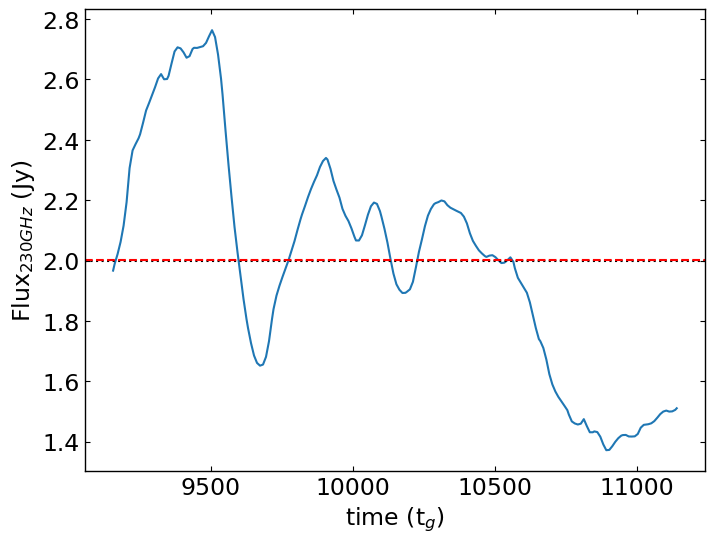

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc70/BHOSS_CODE
100, flux: 1.959140 at 9155.429527
101, flux: 1.972963 at 9160.708492
102, flux: 1.999240 at 9171.268297
103, flux: 2.034613 at 9181.830328
104, flux: 2.077743 at 9192.396246
105, flux: 2.134781 at 9202.960320
106, flux: 2.230890 at 9213.523741
107, flux: 2.277357 at 9224.087047
108, flux: 2.294385 at 9234.649068
109, flux: 2.320773 at 9245.208456
110, flux: 2.343191 at 9250.488437
111, flux: 2.420676 at 9261.047372
112, flux: 2.501494 at 9271.611168
113, flux: 2.524224 at 9282.176408
114, flux: 2.536728 at 9292.737111
115, flux: 2.586511 at 9303.297993
116, flux: 2.623200 at 9313.858757
117, flux: 2.618118 at 9324.417722
118, flux: 2.586348 at 9334.980693
119, flux: 2.597116 at 9345.543632
120, flux: 2.621201 at 9350.825561
121, flux: 2.685891 at 9361.390404
122, flux: 2.748766 at 9371.951983
123, flux: 2.764463 at 9382.514850
124, flux: 2.711747 at 9393.076994
125, flux: 2.679580 at 9403.637

In [32]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [33]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 100/299/200
average z_tot = 1.941288 Jy, the density scale = 1.050000e-19


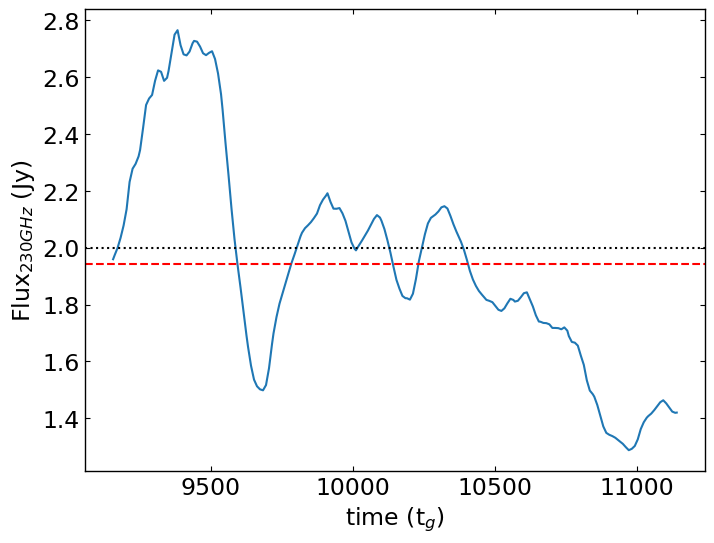

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [35]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc90/BHOSS_CODE
100, flux: 1.978016 at 9155.429527
101, flux: 2.003926 at 9160.708492
102, flux: 2.035635 at 9171.268297
103, flux: 2.052090 at 9181.830328
104, flux: 2.089409 at 9192.396246
105, flux: 2.147952 at 9202.960320
106, flux: 2.287202 at 9213.523741
107, flux: 2.312724 at 9224.087047
108, flux: 2.312699 at 9234.649068
109, flux: 2.337135 at 9245.208456
110, flux: 2.357862 at 9250.488437
111, flux: 2.401857 at 9261.047372
112, flux: 2.461053 at 9271.611168
113, flux: 2.493451 at 9282.176408
114, flux: 2.542497 at 9292.737111
115, flux: 2.598516 at 9303.297993
116, flux: 2.646914 at 9313.858757
117, flux: 2.638172 at 9324.417722
118, flux: 2.598243 at 9334.980693
119, flux: 2.601663 at 9345.543632
120, flux: 2.627243 at 9350.825561
121, flux: 2.666115 at 9361.390404
122, flux: 2.684382 at 9371.951983
123, flux: 2.683769 at 9382.514850
124, flux: 2.670351 at 9393.076994
125, flux: 2.639355 at 9403.637

In [36]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [37]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 100/299/200
average z_tot = 1.923944 Jy, the density scale = 1.000000e-19


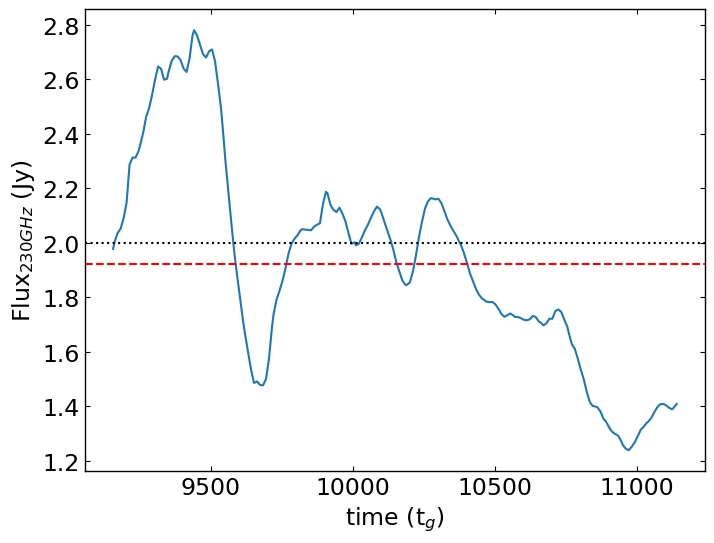

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [39]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc50/BHOSS_CODE
100, flux: 1.883137 at 9155.429527
101, flux: 1.911927 at 9160.708492
102, flux: 1.914491 at 9171.268297
103, flux: 1.890159 at 9181.830328
104, flux: 1.860843 at 9192.396246
105, flux: 1.848049 at 9202.960320
106, flux: 1.916070 at 9213.523741
107, flux: 1.958727 at 9224.087047
108, flux: 1.982595 at 9234.649068
109, flux: 2.040715 at 9245.208456
110, flux: 2.074571 at 9250.488437
111, flux: 2.160217 at 9261.047372
112, flux: 2.236929 at 9271.611168
113, flux: 2.291366 at 9282.176408
114, flux: 2.348320 at 9292.737111
115, flux: 2.408364 at 9303.297993
116, flux: 2.496532 at 9313.858757
117, flux: 2.610755 at 9324.417722
118, flux: 2.688275 at 9334.980693
119, flux: 2.780949 at 9345.543632
120, flux: 2.836971 at 9350.825561
121, flux: 2.964155 at 9361.390404
122, flux: 3.061669 at 9371.951983
123, flux: 3.090245 at 9382.514850
124, flux: 3.103636 at 9393.076994
125, flux: 3.127885 at 9403.637

In [40]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [41]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 100/299/200
average z_tot = 1.964412 Jy, the density scale = 1.900000e-19


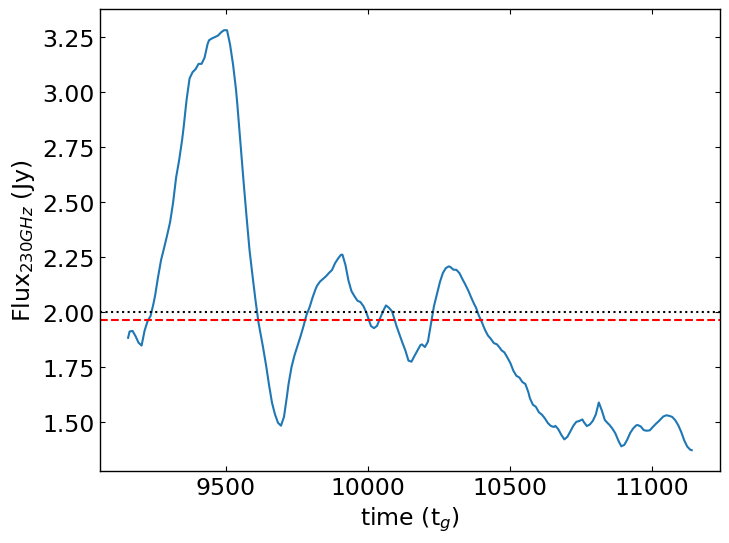

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [43]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc70/BHOSS_CODE
100, flux: 1.980522 at 9155.429527
101, flux: 2.007575 at 9160.708492
102, flux: 2.009251 at 9171.268297
103, flux: 1.976720 at 9181.830328
104, flux: 1.925834 at 9192.396246
105, flux: 1.874566 at 9202.960320
106, flux: 1.920382 at 9213.523741
107, flux: 1.949136 at 9224.087047
108, flux: 1.974132 at 9234.649068
109, flux: 2.042573 at 9245.208456
110, flux: 2.090040 at 9250.488437
111, flux: 2.208770 at 9261.047372
112, flux: 2.281713 at 9271.611168
113, flux: 2.293863 at 9282.176408
114, flux: 2.327468 at 9292.737111
115, flux: 2.398115 at 9303.297993
116, flux: 2.487776 at 9313.858757
117, flux: 2.587202 at 9324.417722
118, flux: 2.662230 at 9334.980693
119, flux: 2.764559 at 9345.543632
120, flux: 2.827590 at 9350.825561
121, flux: 2.980035 at 9361.390404
122, flux: 3.119070 at 9371.951983
123, flux: 3.129040 at 9382.514850
124, flux: 3.097068 at 9393.076994
125, flux: 3.128110 at 9403.637

In [44]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [45]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 100/299/200
average z_tot = 1.973213 Jy, the density scale = 1.760000e-19


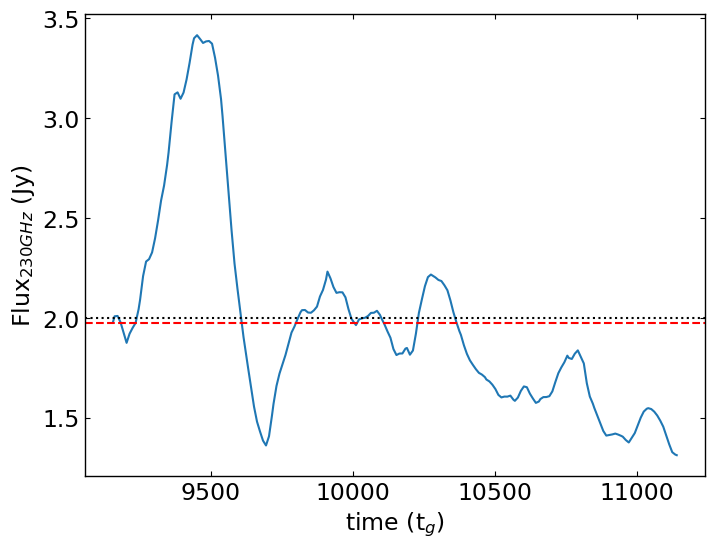

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [47]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(5, 90, "MADA05")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc90/BHOSS_CODE
100, flux: 1.998166 at 9155.429527
101, flux: 2.041854 at 9160.708492
102, flux: 2.033095 at 9171.268297
103, flux: 1.970906 at 9181.830328
104, flux: 1.911981 at 9192.396246
105, flux: 1.865239 at 9202.960320
106, flux: 1.932859 at 9213.523741
107, flux: 1.943242 at 9224.087047
108, flux: 1.953629 at 9234.649068
109, flux: 2.041969 at 9245.208456
110, flux: 2.101516 at 9250.488437
111, flux: 2.191169 at 9261.047372
112, flux: 2.292118 at 9271.611168
113, flux: 2.324068 at 9282.176408
114, flux: 2.376041 at 9292.737111
115, flux: 2.436014 at 9303.297993
116, flux: 2.545685 at 9313.858757
117, flux: 2.634167 at 9324.417722
118, flux: 2.706054 at 9334.980693
119, flux: 2.788142 at 9345.543632
120, flux: 2.847657 at 9350.825561
121, flux: 2.972149 at 9361.390404
122, flux: 3.055848 at 9371.951983
123, flux: 3.034181 at 9382.514850
124, flux: 3.055832 at 9393.076994
125, flux: 3.072722 at 9403.637

In [48]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [49]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 100/299/200
average z_tot = 1.967036 Jy, the density scale = 1.680000e-19


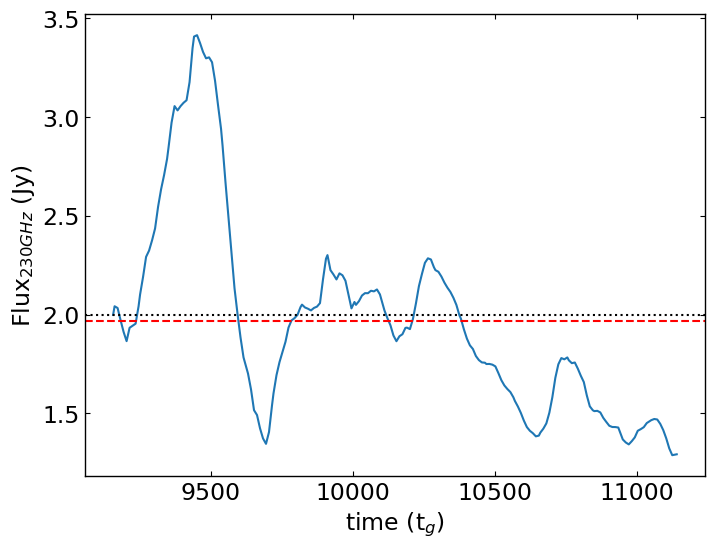

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [51]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(10, 50, "MADA05")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc50/BHOSS_CODE
100, flux: 1.878461 at 9155.429527
101, flux: 1.914711 at 9160.708492
102, flux: 1.913413 at 9171.268297
103, flux: 1.858539 at 9181.830328
104, flux: 1.793420 at 9192.396246
105, flux: 1.731941 at 9202.960320
106, flux: 1.746563 at 9213.523741
107, flux: 1.757477 at 9224.087047
108, flux: 1.768872 at 9234.649068
109, flux: 1.826540 at 9245.208456
110, flux: 1.864836 at 9250.488437
111, flux: 1.955814 at 9261.047372
112, flux: 1.998757 at 9271.611168
113, flux: 2.037870 at 9282.176408
114, flux: 2.091106 at 9292.737111
115, flux: 2.144147 at 9303.297993
116, flux: 2.233101 at 9313.858757
117, flux: 2.386413 at 9324.417722
118, flux: 2.553971 at 9334.980693
119, flux: 2.729336 at 9345.543632
120, flux: 2.811364 at 9350.825561
121, flux: 2.992338 at 9361.390404
122, flux: 3.156420 at 9371.951983
123, flux: 3.235062 at 9382.514850
124, flux: 3.262473 at 9393.076994
125, flux: 3.291696 at 9403.63

In [52]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [53]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 100/299/200
average z_tot = 1.983683 Jy, the density scale = 2.520000e-19


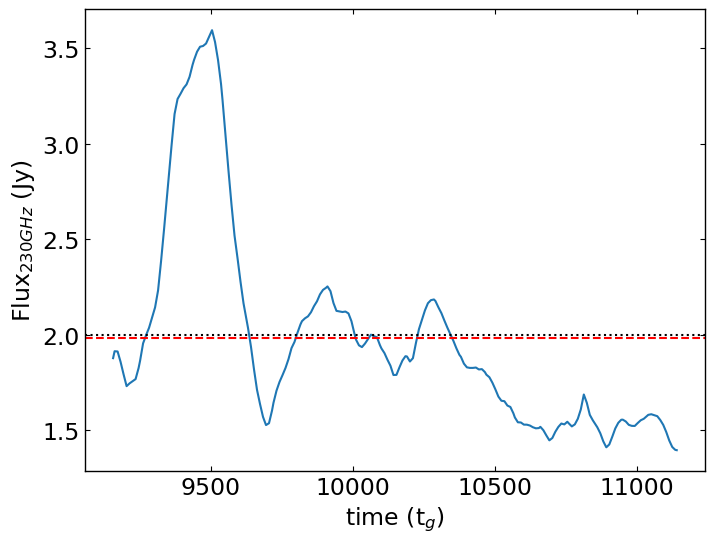

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [55]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(10, 70, "MADA05")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc70/BHOSS_CODE
100, flux: 2.011172 at 9155.429527
101, flux: 2.042542 at 9160.708492
102, flux: 2.033457 at 9171.268297
103, flux: 1.966228 at 9181.830328
104, flux: 1.879218 at 9192.396246
105, flux: 1.783330 at 9202.960320
106, flux: 1.774160 at 9213.523741
107, flux: 1.774242 at 9224.087047
108, flux: 1.798043 at 9234.649068
109, flux: 1.877985 at 9245.208456
110, flux: 1.935486 at 9250.488437
111, flux: 2.047565 at 9261.047372
112, flux: 2.063669 at 9271.611168
113, flux: 2.060182 at 9282.176408
114, flux: 2.097282 at 9292.737111
115, flux: 2.156364 at 9303.297993
116, flux: 2.252516 at 9313.858757
117, flux: 2.382828 at 9324.417722
118, flux: 2.557055 at 9334.980693
119, flux: 2.744706 at 9345.543632
120, flux: 2.826785 at 9350.825561
121, flux: 3.024970 at 9361.390404
122, flux: 3.254433 at 9371.951983
123, flux: 3.332214 at 9382.514850
124, flux: 3.324603 at 9393.076994
125, flux: 3.370105 at 9403.63

In [56]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [57]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 100/299/200
average z_tot = 2.037148 Jy, the density scale = 2.360000e-19


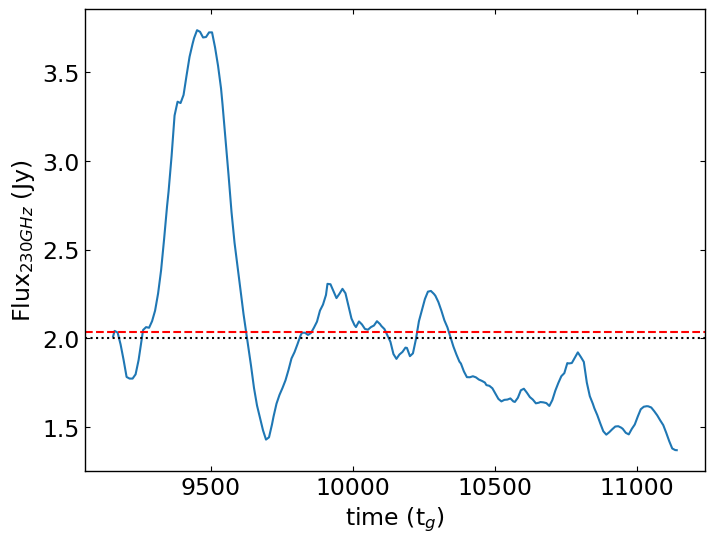

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [59]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(10, 90, "MADA05")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc90/BHOSS_CODE
100, flux: 2.029408 at 9155.429527
101, flux: 2.074276 at 9160.708492
102, flux: 2.060364 at 9171.268297
103, flux: 1.978125 at 9181.830328
104, flux: 1.888081 at 9192.396246
105, flux: 1.786665 at 9202.960320
106, flux: 1.764829 at 9213.523741
107, flux: 1.761194 at 9224.087047
108, flux: 1.788820 at 9234.649068
109, flux: 1.903331 at 9245.208456
110, flux: 1.967435 at 9250.488437
111, flux: 2.043562 at 9261.047372
112, flux: 2.106014 at 9271.611168
113, flux: 2.124249 at 9282.176408
114, flux: 2.176629 at 9292.737111
115, flux: 2.249112 at 9303.297993
116, flux: 2.350166 at 9313.858757
117, flux: 2.454525 at 9324.417722
118, flux: 2.636650 at 9334.980693
119, flux: 2.814323 at 9345.543632
120, flux: 2.903316 at 9350.825561
121, flux: 3.081694 at 9361.390404
122, flux: 3.245612 at 9371.951983
123, flux: 3.288728 at 9382.514850
124, flux: 3.319924 at 9393.076994
125, flux: 3.331956 at 9403.63

In [60]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [61]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 100/299/200
average z_tot = 2.054334 Jy, the density scale = 2.280000e-19


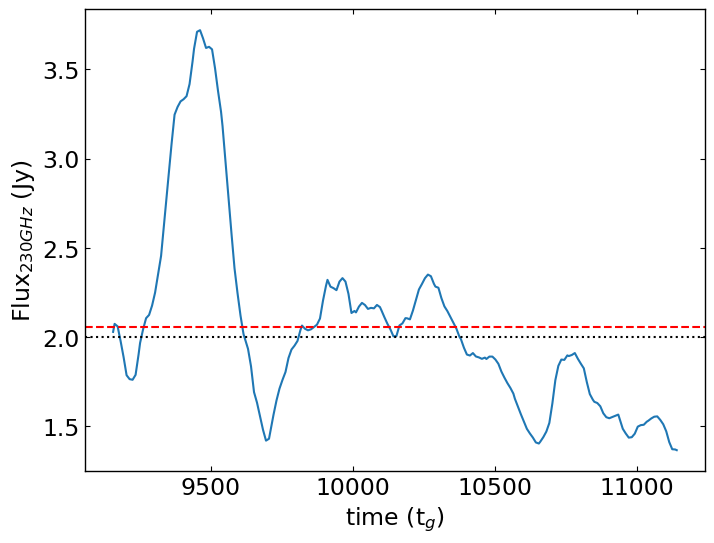

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

# SANE A93

In [64]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(1, 50, "SANEA93")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc50/BHOSS_CODE
99, flux: 2.078475 at 9043.128728
100, flux: 2.059338 at 9054.201523
101, flux: 2.042572 at 9063.696043
102, flux: 2.029420 at 9073.192538
103, flux: 2.017187 at 9084.269539
104, flux: 2.008318 at 9093.760862
105, flux: 1.991052 at 9103.246526
106, flux: 1.991667 at 9114.319883
107, flux: 2.004233 at 9123.813554
108, flux: 2.006473 at 9133.307034
109, flux: 2.009913 at 9144.385666
110, flux: 2.011263 at 9153.878107
111, flux: 2.018618 at 9163.373690
112, flux: 2.031119 at 9174.454441
113, flux: 2.035358 at 9183.942361
114, flux: 2.034174 at 9193.435967
115, flux: 2.040033 at 9204.508599
116, flux: 2.035568 at 9213.993390
117, flux: 2.034181 at 9223.488971
118, flux: 2.034537 at 9234.553237
119, flux: 2.021476 at 9244.039795
120, flux: 2.012027 at 9253.531163
121, flux: 2.005288 at 9264.605898
122, flux: 1.996800 at 9274.096017
123, flux: 1.991949 at 9283.585796
124, flux: 2.003829 at 9293.0771

In [65]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [66]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 1.984171 Jy, the density scale = 8.000000e-19


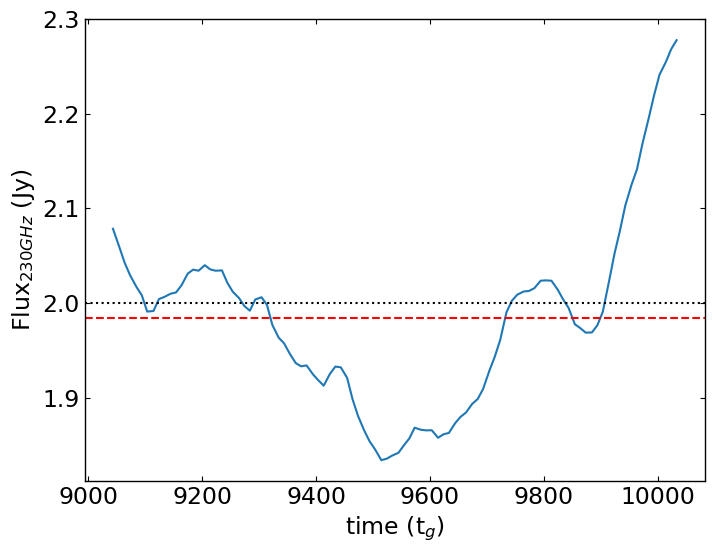

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [68]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(1, 70, "SANEA93")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc70/BHOSS_CODE
99, flux: 2.065924 at 9043.128728
100, flux: 2.033094 at 9054.201523
101, flux: 2.012672 at 9063.696043
102, flux: 1.985428 at 9073.192538
103, flux: 1.966566 at 9084.269539
104, flux: 1.946323 at 9093.760862
105, flux: 1.926729 at 9103.246526
106, flux: 1.944311 at 9114.319883
107, flux: 1.965442 at 9123.813554
108, flux: 1.979308 at 9133.307034
109, flux: 1.984401 at 9144.385666
110, flux: 1.998319 at 9153.878107
111, flux: 2.007367 at 9163.373690
112, flux: 2.035344 at 9174.454441
113, flux: 2.047355 at 9183.942361
114, flux: 2.053313 at 9193.435967
115, flux: 2.051092 at 9204.508599
116, flux: 2.041252 at 9213.993390
117, flux: 2.034689 at 9223.488971
118, flux: 2.008421 at 9234.553237
119, flux: 1.985256 at 9244.039795
120, flux: 1.974031 at 9253.531163
121, flux: 1.954512 at 9264.605898
122, flux: 1.933228 at 9274.096017
123, flux: 1.924691 at 9283.585796
124, flux: 1.935888 at 9293.0771

In [69]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [70]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 1.975401 Jy, the density scale = 8.000000e-19


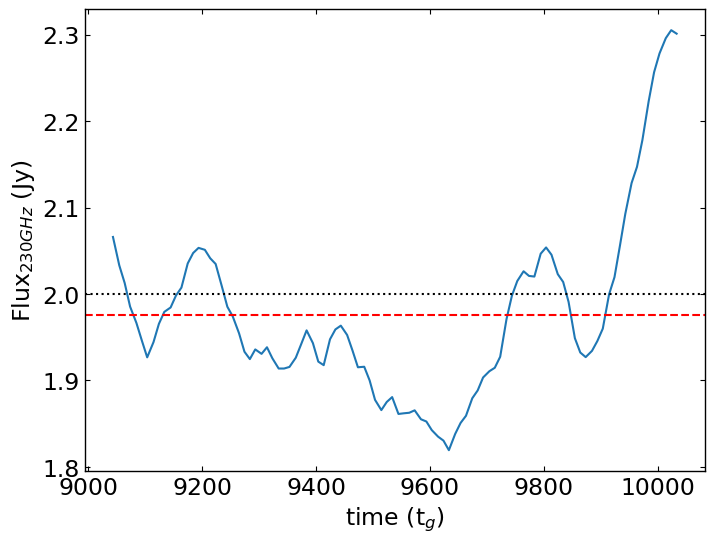

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [72]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(1, 90, "SANEA93")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc90/BHOSS_CODE
99, flux: 2.037994 at 9043.128728
100, flux: 2.015428 at 9054.201523
101, flux: 1.980448 at 9063.696043
102, flux: 1.945836 at 9073.192538
103, flux: 1.930780 at 9084.269539
104, flux: 1.933285 at 9093.760862
105, flux: 1.928506 at 9103.246526
106, flux: 1.960216 at 9114.319883
107, flux: 2.018165 at 9123.813554
108, flux: 2.068322 at 9133.307034
109, flux: 2.093609 at 9144.385666
110, flux: 2.111420 at 9153.878107
111, flux: 2.142105 at 9163.373690
112, flux: 2.176590 at 9174.454441
113, flux: 2.193604 at 9183.942361
114, flux: 2.203846 at 9193.435967
115, flux: 2.179513 at 9204.508599
116, flux: 2.149487 at 9213.993390
117, flux: 2.110815 at 9223.488971
118, flux: 2.045574 at 9234.553237
119, flux: 1.993755 at 9244.039795
120, flux: 1.977102 at 9253.531163
121, flux: 1.956949 at 9264.605898
122, flux: 1.920823 at 9274.096017
123, flux: 1.883420 at 9283.585796
124, flux: 1.878135 at 9293.0771

In [73]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [74]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 1.993646 Jy, the density scale = 8.000000e-19


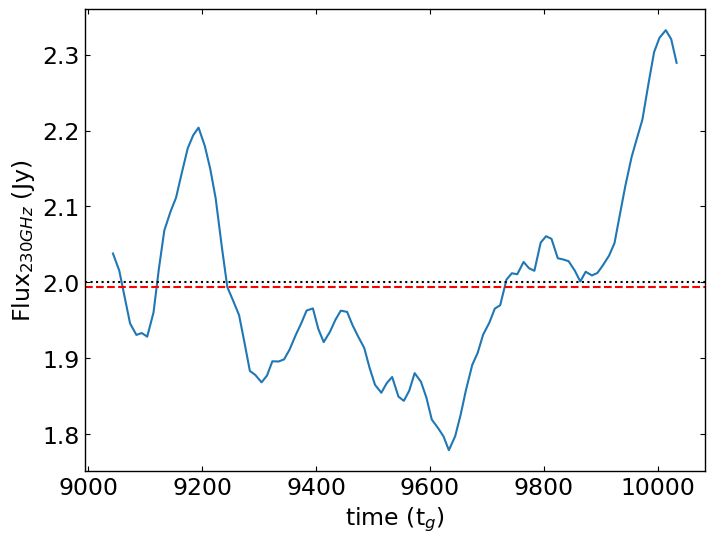

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [97]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(5, 50, "SANEA93")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh5/inc50/BHOSS_CODE
99, flux: 2.116576 at 9043.128728
100, flux: 2.066999 at 9054.201523
101, flux: 2.050493 at 9063.696043
102, flux: 2.019084 at 9073.192538
103, flux: 2.018194 at 9084.269539
104, flux: 2.016909 at 9093.760862
105, flux: 1.980373 at 9103.246526
106, flux: 2.030749 at 9114.319883
107, flux: 2.087253 at 9123.813554
108, flux: 2.058028 at 9133.307034
109, flux: 2.018693 at 9144.385666
110, flux: 2.014603 at 9153.878107
111, flux: 2.077874 at 9163.373690
112, flux: 2.140035 at 9174.454441
113, flux: 2.133115 at 9183.942361
114, flux: 2.126381 at 9193.435967
115, flux: 2.226960 at 9204.508599
116, flux: 2.254430 at 9213.993390
117, flux: 2.242970 at 9223.488971
118, flux: 2.247016 at 9234.553237
119, flux: 2.168274 at 9244.039795
120, flux: 2.168599 at 9253.531163
121, flux: 2.197523 at 9264.605898
122, flux: 2.135376 at 9274.096017
123, flux: 2.061273 at 9283.585796
124, flux: 2.069215 at 9293.0771

In [98]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [99]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.065899 Jy, the density scale = 4.500000e-18


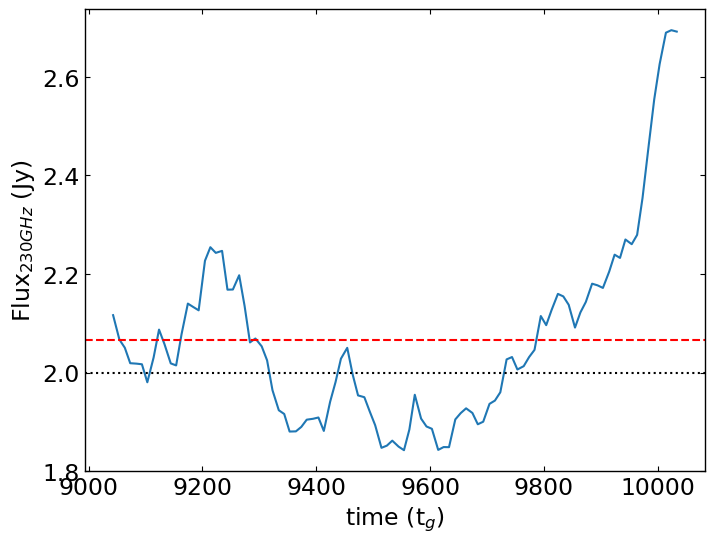

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [101]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(5, 70, "SANEA93")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh5/inc70/BHOSS_CODE
99, flux: 2.041494 at 9043.128728
100, flux: 2.001270 at 9054.201523
101, flux: 1.997006 at 9063.696043
102, flux: 1.920804 at 9073.192538
103, flux: 1.912356 at 9084.269539
104, flux: 1.915301 at 9093.760862
105, flux: 1.905618 at 9103.246526
106, flux: 2.022634 at 9114.319883
107, flux: 2.070999 at 9123.813554
108, flux: 2.058420 at 9133.307034
109, flux: 1.973374 at 9144.385666
110, flux: 1.985371 at 9153.878107
111, flux: 2.019613 at 9163.373690
112, flux: 2.102388 at 9174.454441
113, flux: 2.117471 at 9183.942361
114, flux: 2.127579 at 9193.435967
115, flux: 2.195409 at 9204.508599
116, flux: 2.199688 at 9213.993390
117, flux: 2.179854 at 9223.488971
118, flux: 2.114660 at 9234.553237
119, flux: 2.035381 at 9244.039795
120, flux: 2.070023 at 9253.531163
121, flux: 2.084159 at 9264.605898
122, flux: 2.009620 at 9274.096017
123, flux: 1.924989 at 9283.585796
124, flux: 1.933199 at 9293.0771

In [102]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [103]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.010500 Jy, the density scale = 4.300000e-18


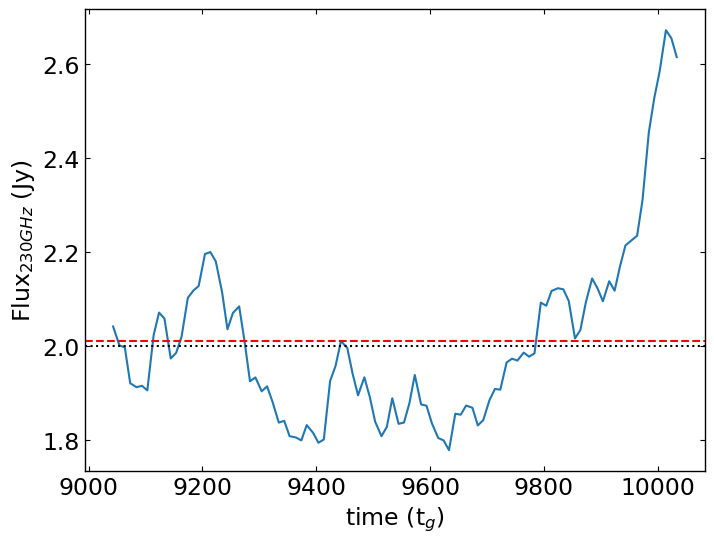

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [105]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(5, 90, "SANEA93")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh5/inc90/BHOSS_CODE
99, flux: 2.063315 at 9043.128728
100, flux: 2.037569 at 9054.201523
101, flux: 2.024074 at 9063.696043
102, flux: 1.933987 at 9073.192538
103, flux: 1.889983 at 9084.269539
104, flux: 1.915383 at 9093.760862
105, flux: 1.910749 at 9103.246526
106, flux: 2.033714 at 9114.319883
107, flux: 2.132297 at 9123.813554
108, flux: 2.128216 at 9133.307034
109, flux: 2.054640 at 9144.385666
110, flux: 2.056633 at 9153.878107
111, flux: 2.114885 at 9163.373690
112, flux: 2.224990 at 9174.454441
113, flux: 2.210337 at 9183.942361
114, flux: 2.271931 at 9193.435967
115, flux: 2.302109 at 9204.508599
116, flux: 2.301434 at 9213.993390
117, flux: 2.250972 at 9223.488971
118, flux: 2.097605 at 9234.553237
119, flux: 1.991634 at 9244.039795
120, flux: 2.054894 at 9253.531163
121, flux: 2.103991 at 9264.605898
122, flux: 2.002364 at 9274.096017
123, flux: 1.903121 at 9283.585796
124, flux: 1.925384 at 9293.0771

In [106]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [107]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.028397 Jy, the density scale = 4.300000e-18


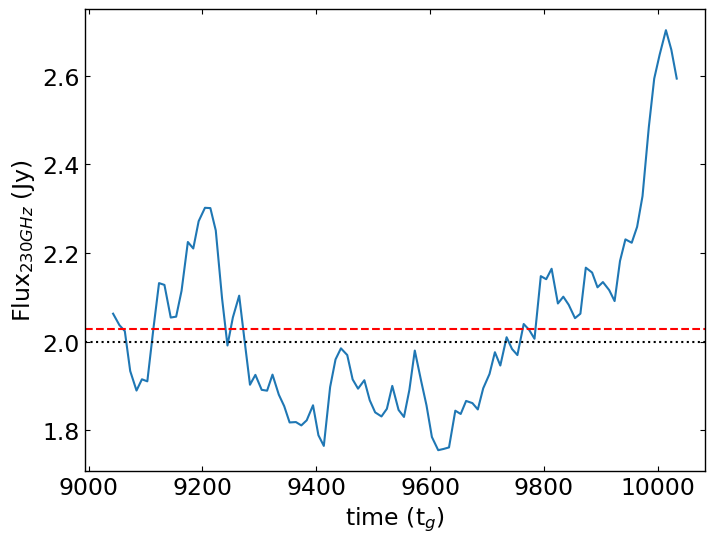

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [109]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(10, 50, "SANEA93")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh10/inc50/BHOSS_CODE
99, flux: 2.059621 at 9043.128728
100, flux: 2.024873 at 9054.201523
101, flux: 2.027274 at 9063.696043
102, flux: 2.004845 at 9073.192538
103, flux: 2.015651 at 9084.269539
104, flux: 2.028607 at 9093.760862
105, flux: 2.007458 at 9103.246526
106, flux: 2.025545 at 9114.319883
107, flux: 2.075255 at 9123.813554
108, flux: 2.066689 at 9133.307034
109, flux: 2.022952 at 9144.385666
110, flux: 2.057678 at 9153.878107
111, flux: 2.141966 at 9163.373690
112, flux: 2.162620 at 9174.454441
113, flux: 2.116107 at 9183.942361
114, flux: 2.090174 at 9193.435967
115, flux: 2.207676 at 9204.508599
116, flux: 2.269816 at 9213.993390
117, flux: 2.283319 at 9223.488971
118, flux: 2.255866 at 9234.553237
119, flux: 2.177225 at 9244.039795
120, flux: 2.219358 at 9253.531163
121, flux: 2.253827 at 9264.605898
122, flux: 2.182657 at 9274.096017
123, flux: 2.066954 at 9283.585796
124, flux: 2.039969 at 9293.077

In [110]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [111]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.041079 Jy, the density scale = 1.180000e-17


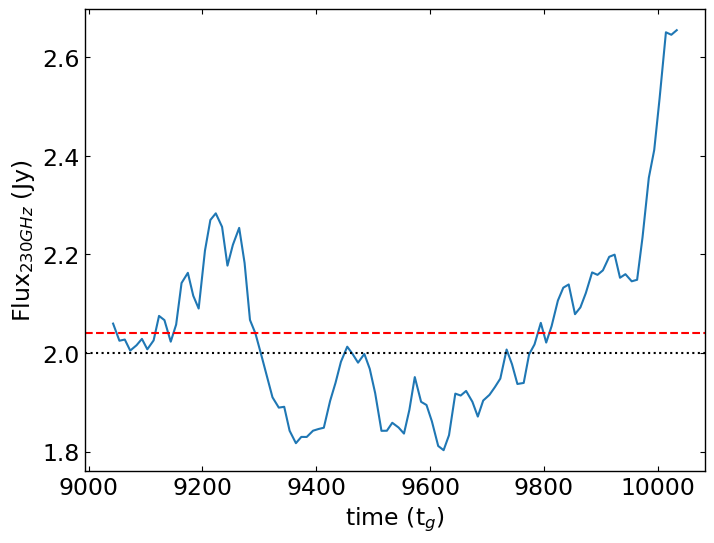

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [113]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(10, 70, "SANEA93")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh10/inc70/BHOSS_CODE
99, flux: 2.025930 at 9043.128728
100, flux: 2.014669 at 9054.201523
101, flux: 2.026071 at 9063.696043
102, flux: 1.955594 at 9073.192538
103, flux: 1.966548 at 9084.269539
104, flux: 1.969545 at 9093.760862
105, flux: 1.987978 at 9103.246526
106, flux: 2.084400 at 9114.319883
107, flux: 2.127283 at 9123.813554
108, flux: 2.090394 at 9133.307034
109, flux: 1.979222 at 9144.385666
110, flux: 2.032906 at 9153.878107
111, flux: 2.101739 at 9163.373690
112, flux: 2.142947 at 9174.454441
113, flux: 2.137163 at 9183.942361
114, flux: 2.139543 at 9193.435967
115, flux: 2.249624 at 9204.508599
116, flux: 2.318051 at 9213.993390
117, flux: 2.308211 at 9223.488971
118, flux: 2.178960 at 9234.553237
119, flux: 2.100452 at 9244.039795
120, flux: 2.155881 at 9253.531163
121, flux: 2.200695 at 9264.605898
122, flux: 2.103458 at 9274.096017
123, flux: 1.983545 at 9283.585796
124, flux: 1.956042 at 9293.077

In [114]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [115]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.031864 Jy, the density scale = 1.180000e-17


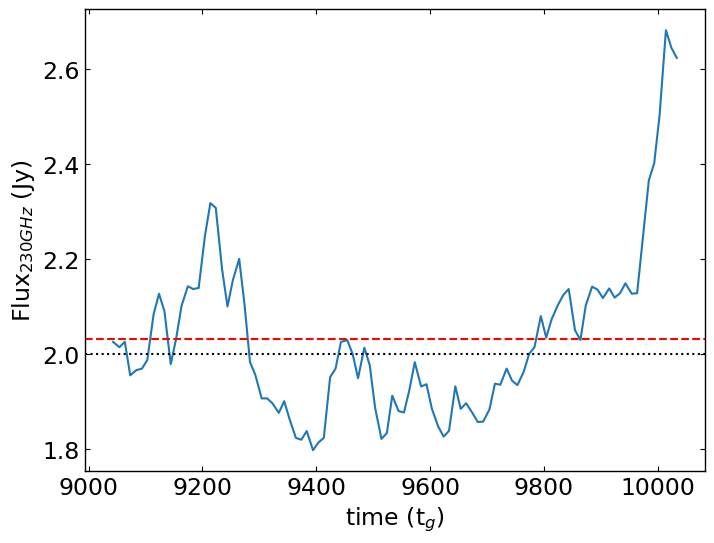

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [117]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)

ind,time,z_tot,dscale = bhoss_avg(10, 90, "SANEA93")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh10/inc90/BHOSS_CODE
99, flux: 2.034666 at 9043.128728
100, flux: 2.038315 at 9054.201523
101, flux: 2.071810 at 9063.696043
102, flux: 1.971551 at 9073.192538
103, flux: 1.910644 at 9084.269539
104, flux: 1.938571 at 9093.760862
105, flux: 1.964205 at 9103.246526
106, flux: 2.064722 at 9114.319883
107, flux: 2.185913 at 9123.813554
108, flux: 2.138754 at 9133.307034
109, flux: 2.032126 at 9144.385666
110, flux: 2.039270 at 9153.878107
111, flux: 2.115159 at 9163.373690
112, flux: 2.192726 at 9174.454441
113, flux: 2.148552 at 9183.942361
114, flux: 2.196317 at 9193.435967
115, flux: 2.327680 at 9204.508599
116, flux: 2.361148 at 9213.993390
117, flux: 2.307653 at 9223.488971
118, flux: 2.083965 at 9234.553237
119, flux: 1.971897 at 9244.039795
120, flux: 2.038166 at 9253.531163
121, flux: 2.128548 at 9264.605898
122, flux: 2.039003 at 9274.096017
123, flux: 1.911972 at 9283.585796
124, flux: 1.917038 at 9293.077

In [118]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [119]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 99/198/100
average z_tot = 2.000843 Jy, the density scale = 1.180000e-17


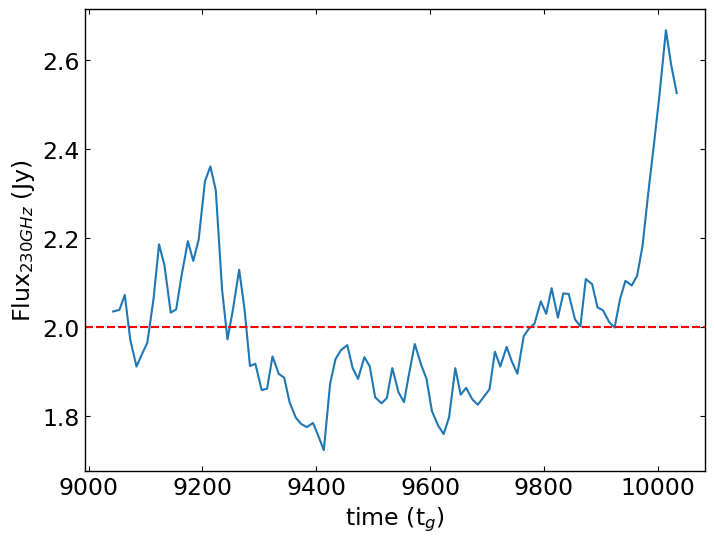

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

# SANE A93 M  -- OLD

In [12]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
ind,time,z_tot,dscale = bhoss_avg(1, 50, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc50/BHOSS_CODE
132, flux: 1.709871 at 9925.528924
133, flux: 1.735820 at 9934.173457
134, flux: 1.780036 at 9942.822006
135, flux: 1.842269 at 9955.791871
136, flux: 1.884749 at 9964.438576
137, flux: 1.912984 at 9973.082137
138, flux: 1.979805 at 9986.049828
139, flux: 2.038319 at 9994.698523
140, flux: 2.096432 at 10003.343218
141, flux: 2.201812 at 10016.310270
142, flux: 2.256783 at 10024.962133
143, flux: 2.295616 at 10033.615429
144, flux: 2.366397 at 10046.591838
145, flux: 2.409362 at 10055.242073
146, flux: 2.436367 at 10063.900253
147, flux: 2.472373 at 10076.889057
148, flux: 2.485323 at 10085.542268
149, flux: 2.505779 at 10094.188939
150, flux: 2.530979 at 10102.838018
151, flux: 2.536266 at 10115.820650
152, flux: 2.522225 at 10124.473785
153, flux: 2.510965 at 10133.126518
154, flux: 2.491807 at 10146.100336
155, flux: 2.462362 at 10154.746542
156, flux: 2.421701 at 10163.398930
157, flux: 2.

In [13]:
print(ind)

[132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229.
 230. 231.]


In [14]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [15]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.044633 Jy, the density scale = 6.700000e-15


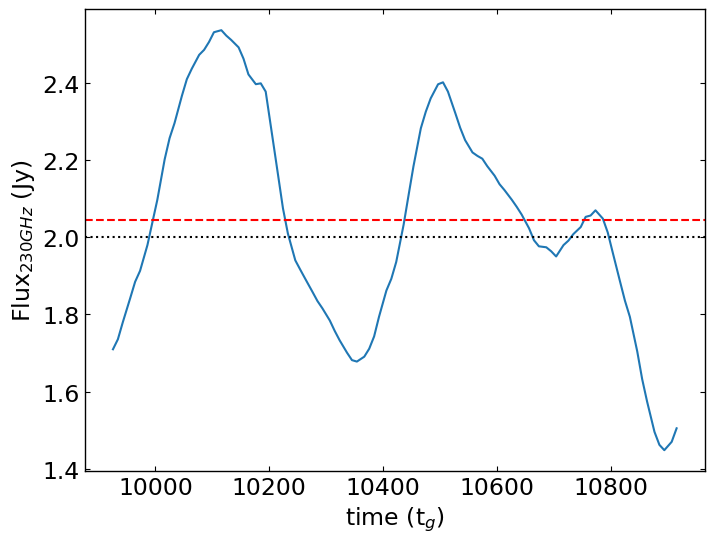

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [43]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
ind,time,z_tot,dscale = bhoss_avg(1, 50, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc50/BHOSS_CODE
132, flux: 2.010155 at 9925.528924
133, flux: 2.041738 at 9934.173457
134, flux: 2.091410 at 9942.822006
135, flux: 2.160507 at 9955.791871
136, flux: 2.207483 at 9964.438576
137, flux: 2.237955 at 9973.082137
138, flux: 2.306967 at 9986.049828
139, flux: 2.364812 at 9994.698523
140, flux: 2.418254 at 10003.343218
141, flux: 2.517678 at 10016.310270
142, flux: 2.568649 at 10024.962133
143, flux: 2.604745 at 10033.615429
144, flux: 2.675822 at 10046.591838
145, flux: 2.720299 at 10055.242073
146, flux: 2.749486 at 10063.900253
147, flux: 2.787931 at 10076.889057
148, flux: 2.799414 at 10085.542268
149, flux: 2.820962 at 10094.188939
150, flux: 2.848523 at 10102.838018
151, flux: 2.853817 at 10115.820650
152, flux: 2.837753 at 10124.473785
153, flux: 2.824442 at 10133.126518
154, flux: 2.801353 at 10146.100336
155, flux: 2.768592 at 10154.746542
156, flux: 2.723082 at 10163.398930
157, flux: 2.

In [44]:
print(ind)

[132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229.
 230. 231.]


In [45]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [46]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.325463 Jy, the density scale = 7.200000e-15


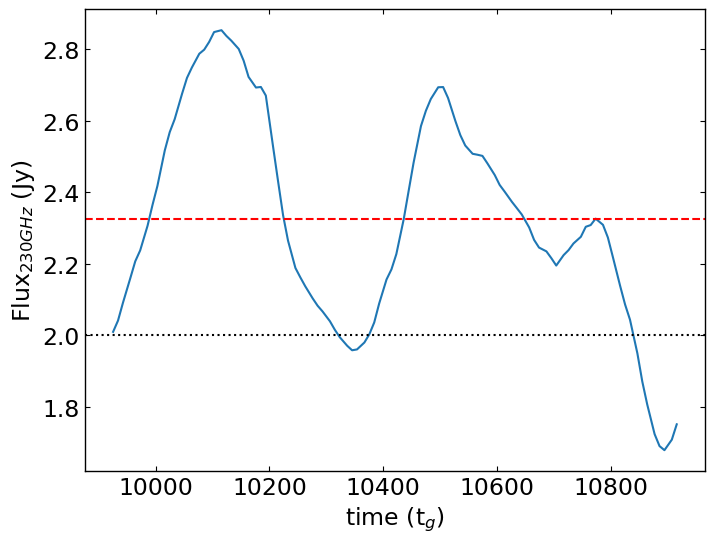

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [91]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
ind,time,z_tot,dscale = bhoss_avg(1, 70, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc70/BHOSS_CODE
132, flux: 1.801320 at 9925.528924
133, flux: 1.835825 at 9934.173457
134, flux: 1.881132 at 9942.822006
135, flux: 1.924288 at 9955.791871
136, flux: 1.941011 at 9964.438576
137, flux: 1.948261 at 9973.082137
138, flux: 1.989988 at 9986.049828
139, flux: 2.040263 at 9994.698523
140, flux: 2.098305 at 10003.343218
141, flux: 2.188471 at 10016.310270
142, flux: 2.234296 at 10024.962133
143, flux: 2.259638 at 10033.615429
144, flux: 2.314637 at 10046.591838
145, flux: 2.344429 at 10055.242073
146, flux: 2.359990 at 10063.900253
147, flux: 2.369533 at 10076.889057
148, flux: 2.357003 at 10085.542268
149, flux: 2.335039 at 10094.188939
150, flux: 2.311234 at 10102.838018
151, flux: 2.270267 at 10115.820650
152, flux: 2.247916 at 10124.473785
153, flux: 2.231075 at 10133.126518
154, flux: 2.200807 at 10146.100336
155, flux: 2.179728 at 10154.746542
156, flux: 2.153467 at 10163.398930
157, flux: 2.

In [92]:
print(ind)

[132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229.
 230. 231.]


In [93]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [94]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 1.969841 Jy, the density scale = 7.100000e-15


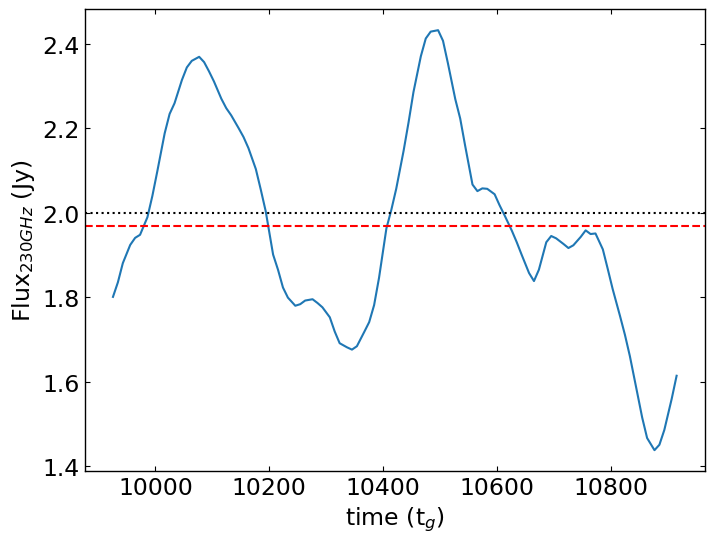

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [17]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
ind,time,z_tot,dscale = bhoss_avg(1, 90, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc90/BHOSS_CODE
132, flux: 2.013719 at 9925.528924
133, flux: 2.054371 at 9934.173457
134, flux: 2.083370 at 9942.822006
135, flux: 2.084513 at 9955.791871
136, flux: 2.075463 at 9964.438576
137, flux: 2.060937 at 9973.082137
138, flux: 2.138927 at 9986.049828
139, flux: 2.207868 at 9994.698523
140, flux: 2.314844 at 10003.343218
141, flux: 2.461277 at 10016.310270
142, flux: 2.518600 at 10024.962133
143, flux: 2.507846 at 10033.615429
144, flux: 2.460224 at 10046.591838
145, flux: 2.440707 at 10055.242073
146, flux: 2.376275 at 10063.900253
147, flux: 2.304626 at 10076.889057
148, flux: 2.247067 at 10085.542268
149, flux: 2.173633 at 10094.188939
150, flux: 2.120467 at 10102.838018
151, flux: 2.088498 at 10115.820650
152, flux: 2.080039 at 10124.473785
153, flux: 2.045740 at 10133.126518
154, flux: 2.014098 at 10146.100336
155, flux: 2.012436 at 10154.746542
156, flux: 2.022832 at 10163.398930
157, flux: 1.

In [18]:
print(ind)

[132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229.
 230. 231.]


In [19]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [20]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 1.960383 Jy, the density scale = 7.260000e-15


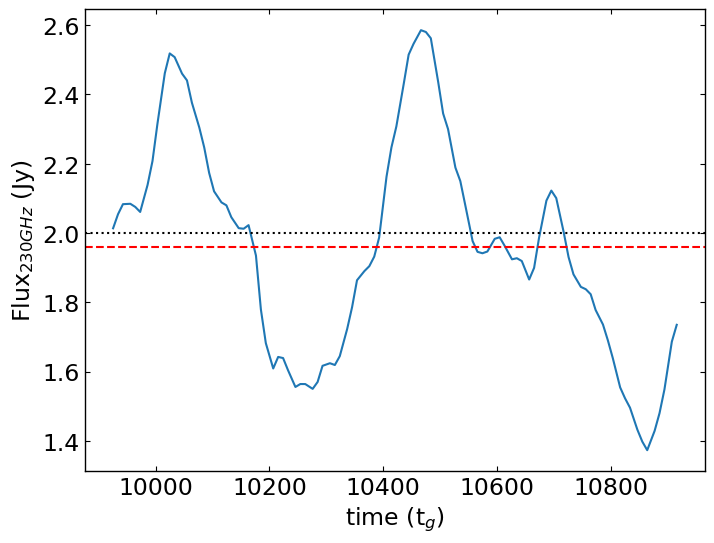

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [22]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
ind,time,z_tot,dscale = bhoss_avg(5, 50, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc50/BHOSS_CODE
132, flux: 1.834864 at 9925.528924
133, flux: 1.835586 at 9934.173457
134, flux: 1.850938 at 9942.822006
135, flux: 1.829163 at 9955.791871
136, flux: 1.815649 at 9964.438576
137, flux: 1.820269 at 9973.082137
138, flux: 1.872303 at 9986.049828
139, flux: 1.909752 at 9994.698523
140, flux: 1.926490 at 10003.343218
141, flux: 1.961328 at 10016.310270
142, flux: 1.998250 at 10024.962133
143, flux: 1.990123 at 10033.615429
144, flux: 1.976400 at 10046.591838
145, flux: 1.994247 at 10055.242073
146, flux: 1.977386 at 10063.900253
147, flux: 1.981848 at 10076.889057
148, flux: 2.013120 at 10085.542268
149, flux: 2.052843 at 10094.188939
150, flux: 2.100955 at 10102.838018
151, flux: 2.185592 at 10115.820650
152, flux: 2.257959 at 10124.473785
153, flux: 2.334985 at 10133.126518
154, flux: 2.368219 at 10146.100336
155, flux: 2.361144 at 10154.746542
156, flux: 2.334947 at 10163.398930
157, flux: 2.

In [23]:
print(ind)

[132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229.
 230. 231.]


In [24]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [25]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.045730 Jy, the density scale = 2.800000e-14


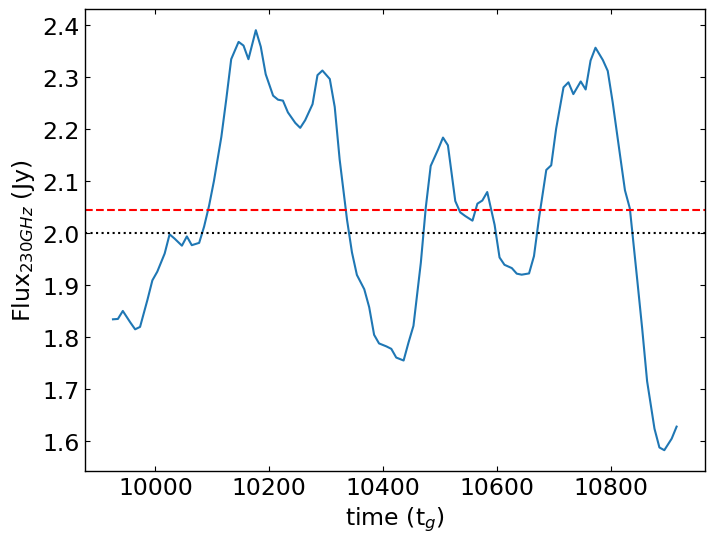

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [27]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
ind,time,z_tot,dscale = bhoss_avg(5, 70, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc70/BHOSS_CODE
132, flux: 1.854797 at 9925.528924
133, flux: 1.860920 at 9934.173457
134, flux: 1.851901 at 9942.822006
135, flux: 1.789664 at 9955.791871
136, flux: 1.760648 at 9964.438576
137, flux: 1.771128 at 9973.082137
138, flux: 1.823252 at 9986.049828
139, flux: 1.860579 at 9994.698523
140, flux: 1.913296 at 10003.343218
141, flux: 1.957951 at 10016.310270
142, flux: 1.981465 at 10024.962133
143, flux: 2.002727 at 10033.615429
144, flux: 2.022344 at 10046.591838
145, flux: 2.031709 at 10055.242073
146, flux: 2.006374 at 10063.900253
147, flux: 2.032132 at 10076.889057
148, flux: 2.071842 at 10085.542268
149, flux: 2.095917 at 10094.188939
150, flux: 2.130254 at 10102.838018
151, flux: 2.214791 at 10115.820650
152, flux: 2.273405 at 10124.473785
153, flux: 2.339335 at 10133.126518
154, flux: 2.356683 at 10146.100336
155, flux: 2.340143 at 10154.746542
156, flux: 2.292699 at 10163.398930
157, flux: 2.

In [28]:
print(ind)

[132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229.
 230. 231.]


In [29]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [30]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.037609 Jy, the density scale = 2.900000e-14


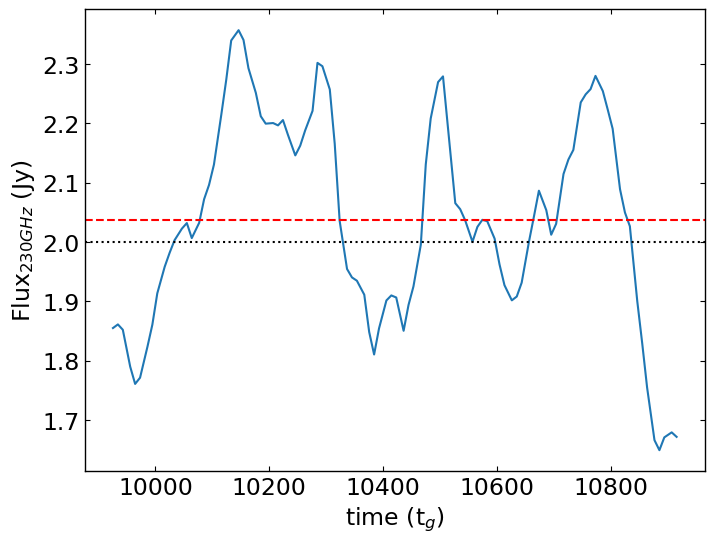

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [32]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
ind,time,z_tot,dscale = bhoss_avg(5, 90, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc90/BHOSS_CODE
132, flux: 1.843179 at 9925.528924
133, flux: 1.860494 at 9934.173457
134, flux: 1.839778 at 9942.822006
135, flux: 1.782949 at 9955.791871
136, flux: 1.780254 at 9964.438576
137, flux: 1.791986 at 9973.082137
138, flux: 1.848004 at 9986.049828
139, flux: 1.888217 at 9994.698523
140, flux: 1.947663 at 10003.343218
141, flux: 2.031003 at 10016.310270
142, flux: 2.037700 at 10024.962133
143, flux: 2.036599 at 10033.615429
144, flux: 2.066785 at 10046.591838
145, flux: 2.051171 at 10055.242073
146, flux: 1.989883 at 10063.900253
147, flux: 2.012721 at 10076.889057
148, flux: 2.057167 at 10085.542268
149, flux: 2.085037 at 10094.188939
150, flux: 2.109666 at 10102.838018
151, flux: 2.125867 at 10115.820650
152, flux: 2.134114 at 10124.473785
153, flux: 2.136087 at 10133.126518
154, flux: 2.181414 at 10146.100336
155, flux: 2.232493 at 10154.746542
156, flux: 2.269243 at 10163.398930
157, flux: 2.

In [33]:
print(ind)

[132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229.
 230. 231.]


In [34]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [35]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 1.946754 Jy, the density scale = 3.000000e-14


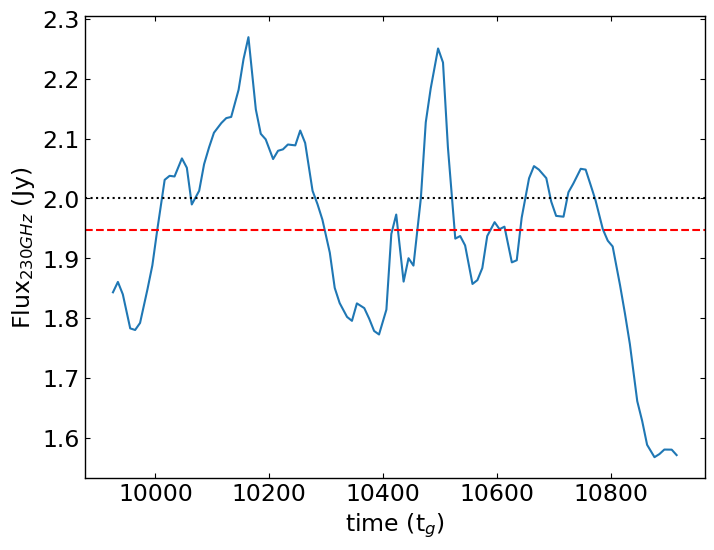

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [37]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
ind,time,z_tot,dscale = bhoss_avg(10, 50, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc50/BHOSS_CODE
132, flux: 1.834451 at 9925.528924
133, flux: 1.809081 at 9934.173457
134, flux: 1.803890 at 9942.822006
135, flux: 1.775715 at 9955.791871
136, flux: 1.758807 at 9964.438576
137, flux: 1.789616 at 9973.082137
138, flux: 1.872977 at 9986.049828
139, flux: 1.939711 at 9994.698523
140, flux: 1.973088 at 10003.343218
141, flux: 2.023335 at 10016.310270
142, flux: 2.057796 at 10024.962133
143, flux: 2.021888 at 10033.615429
144, flux: 1.969538 at 10046.591838
145, flux: 1.964269 at 10055.242073
146, flux: 1.945102 at 10063.900253
147, flux: 1.956643 at 10076.889057
148, flux: 2.006369 at 10085.542268
149, flux: 2.045675 at 10094.188939
150, flux: 2.103269 at 10102.838018
151, flux: 2.191019 at 10115.820650
152, flux: 2.255274 at 10124.473785
153, flux: 2.333179 at 10133.126518
154, flux: 2.379101 at 10146.100336
155, flux: 2.369721 at 10154.746542
156, flux: 2.321017 at 10163.398930
157, flux: 2

In [38]:
print(ind)

[132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229.
 230. 231.]


In [39]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [40]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.011972 Jy, the density scale = 4.000000e-14


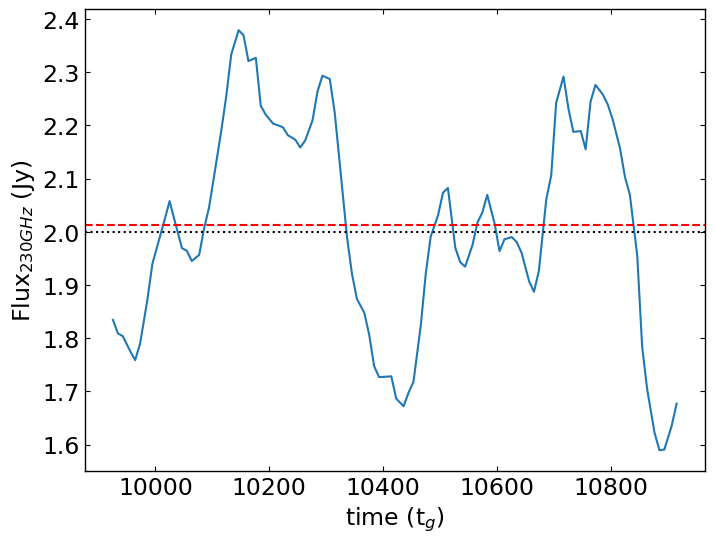

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [42]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
ind,time,z_tot,dscale = bhoss_avg(10, 70, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc70/BHOSS_CODE
132, flux: 1.884273 at 9925.528924
133, flux: 1.872743 at 9934.173457
134, flux: 1.842725 at 9942.822006
135, flux: 1.780265 at 9955.791871
136, flux: 1.759582 at 9964.438576
137, flux: 1.798788 at 9973.082137
138, flux: 1.872086 at 9986.049828
139, flux: 1.933137 at 9994.698523
140, flux: 1.983828 at 10003.343218
141, flux: 2.020406 at 10016.310270
142, flux: 2.033041 at 10024.962133
143, flux: 2.031805 at 10033.615429
144, flux: 2.007398 at 10046.591838
145, flux: 1.989526 at 10055.242073
146, flux: 1.958983 at 10063.900253
147, flux: 1.989457 at 10076.889057
148, flux: 2.045489 at 10085.542268
149, flux: 2.084742 at 10094.188939
150, flux: 2.131673 at 10102.838018
151, flux: 2.235308 at 10115.820650
152, flux: 2.288943 at 10124.473785
153, flux: 2.359396 at 10133.126518
154, flux: 2.383109 at 10146.100336
155, flux: 2.345041 at 10154.746542
156, flux: 2.286676 at 10163.398930
157, flux: 2

In [43]:
print(ind)

[132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229.
 230. 231.]


In [44]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [45]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.019399 Jy, the density scale = 4.100000e-14


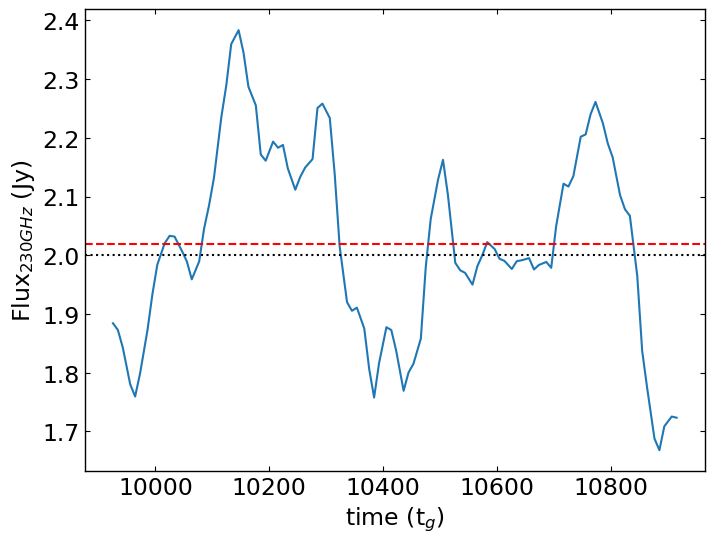

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [127]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
ind,time,z_tot,dscale = bhoss_avg(10, 90, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc90/BHOSS_CODE
132, flux: 1.979857 at 9925.528924
133, flux: 1.956284 at 9934.173457
134, flux: 1.899123 at 9942.822006
135, flux: 1.853994 at 9955.791871
136, flux: 1.868908 at 9964.438576
137, flux: 1.913686 at 9973.082137
138, flux: 1.995233 at 9986.049828
139, flux: 2.034471 at 9994.698523
140, flux: 2.097702 at 10003.343218
141, flux: 2.170575 at 10016.310270
142, flux: 2.172515 at 10024.962133
143, flux: 2.145035 at 10033.615429
144, flux: 2.136268 at 10046.591838
145, flux: 2.097342 at 10055.242073
146, flux: 2.046865 at 10063.900253
147, flux: 2.067316 at 10076.889057
148, flux: 2.123864 at 10085.542268
149, flux: 2.165801 at 10094.188939
150, flux: 2.223218 at 10102.838018
151, flux: 2.258552 at 10115.820650
152, flux: 2.274188 at 10124.473785
153, flux: 2.285331 at 10133.126518
154, flux: 2.321819 at 10146.100336
155, flux: 2.369732 at 10154.746542
156, flux: 2.409690 at 10163.398930
157, flux: 2

In [128]:
print(ind)

[132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229.
 230. 231.]


In [129]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [130]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.029163 Jy, the density scale = 4.420000e-14


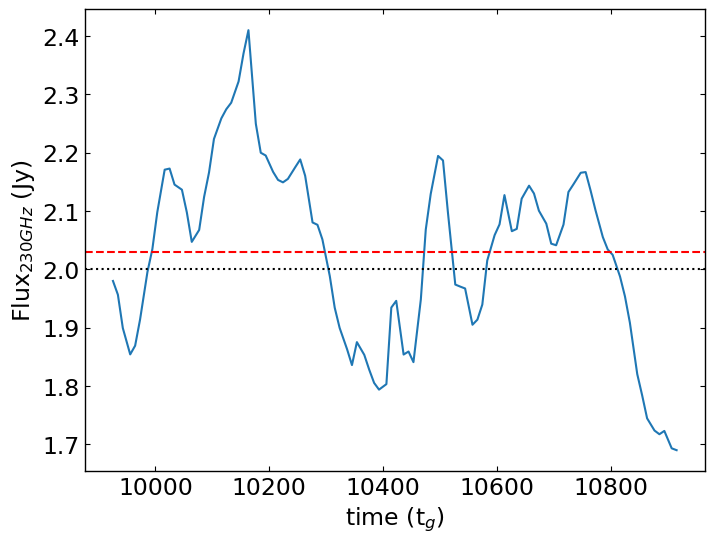

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))